# Fundamentals of NLP with Tensorflow

> NLP has the goal of deriving information out of natural languages(could be sequences, texts or speech).

> Another common term for NLP problems is sequences to sequence problems(seq2seq)

## Importing helper functions

In [1]:
!wget https://raw.githubusercontent.com/arghanath007/MachineLearning/main/Deep%20Learning/Transfer%20Learning/helper_functions.py

--2022-08-23 11:21:49--  https://raw.githubusercontent.com/arghanath007/MachineLearning/main/Deep%20Learning/Transfer%20Learning/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19296 (19K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  18.84K  --.-KB/s    in 0s      

2022-08-23 11:21:50 (70.8 MB/s) - ‘helper_functions.py’ saved [19296/19296]



In [2]:
from helper_functions import unzip_data, plot_loss_curves, compare_historys, create_data_augmented_layer_for_model, load_and_prep_image, make_confusion_matrix, make_confusion_matrix_for_larger_dataset

## Getting the dataset

> The dataset we are using is the Kaggle's introductionn to NLP dataset(text samples of Tweet labelled as disaster or not disaster).

This is the link of the dataset -> [Kaggle Dataset](https://www.kaggle.com/competitions/nlp-getting-started)

In [3]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2022-08-23 11:21:54--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.197.128, 74.125.135.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.006s  

2022-08-23 11:21:54 (98.3 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [4]:
unzip_data('nlp_getting_started.zip')

## Visualizing the dataset

In [5]:
import pandas as pd
import numpy as np

In [6]:
train= pd.read_csv('/content/train.csv')
test= pd.read_csv('/content/test.csv')

In [7]:
train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [8]:
train['text'][4]

'Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school '

## Conclusion

* `1` -> Means a disaster(Positive)
* `0` -> Means not a disaster(negative)

## Shuffeling the data

In [9]:
train_shuffled= train.sample(frac= 1, random_state=22)
train_shuffled

,id,keyword,location,text,target
1467,2115,catastrophe,Florida,@deb117 7/30 that catastrophe man opens school...,0
6453,9232,suicide%20bombing,NaN,meek mill should join isis since he loves suic...,0
5698,8131,rescued,Ireland,Three beached whales rescued in Kerry - http:/...,1
5769,8236,riot,Seattle,Southeast Dirt Riot Series Crowns Champions: ...,0
6853,9822,trauma,NaN,Hiroshima: They told me to paint my story: Eig...,1
...,...,...,...,...,...
356,513,army,Studio,But if you build an army of 100 dogs and their...,1
7104,10177,violent%20storm,NaN,I don't understand 'taking' ANY life as a trop...,1
4908,6985,massacre,NaN,@nataliealund \nParents of Colorado theater sh...,1
6276,8967,storm,"Wilmington, NC",New item: Pillow Covers ANY SIZE Pillow Cover ...,0


In [10]:
train_shuffled['text'][1467]

"@deb117 7/30 that catastrophe man opens school w/another he's an athlete not a teacher a principle not fulfilling any inside clerical duties"

### Test dataset

In [11]:
test

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


## Balance of the dataset

In [12]:
train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

## Visualizing the data

In [13]:
import random
random_index= random.randint(0, len(train)-10)
for row in train_shuffled[["text", "target"]][random_index: random_index +10].itertuples():
  _, text, target= row
  print(f"Target: {target}, (real disaster)" if target > 0 else "(not real disaster)")
  print(f"Text: \n{text}\n")
  print("-----\n")

Target: 1, (real disaster)
Text: 
Learning from the Legacy of a Catastrophic Eruption - The New Yorker http://t.co/vMWTOUyOHm

-----

Target: 1, (real disaster)
Text: 
What Irony Debris of Flight MH370 found on 'Reunion Island'.

-----

(not real disaster)
Text: 
tiffanyfrizzell has a crush: http://t.co/RaF732vRtt

-----

Target: 1, (real disaster)
Text: 
@minhazmerchant Great job done by village hostages

-----

(not real disaster)
Text: 
@RonWyden Democrats restricted  Blacks from Voting. In 48' Landslide Lyndon Johnson won Senate Election by 67 Votes of Dead People in Texas!

-----

(not real disaster)
Text: 
@StephanieMarija 'light rain' was the forecast I based my dressing on. Light. Rain. Not incessant deluge!

-----

(not real disaster)
Text: 
@klavierstuk doesn't so LVG is forced into the market. May beat Spurs and smaller teams with Blind LCB. Top 4/ CL teams will obliterate us.

-----

(not real disaster)
Text: 
Jen you da bomb girl! https://t.co/czQr3CI9Xw

-----

(not real 

## Creating Validation dataset from test dataset

In [14]:
len(train_shuffled), len(test)

(7613, 3263)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
train_sentences, val_sentences, train_labels, val_labels= train_test_split(train_shuffled['text'].to_numpy(), train_shuffled['target'].to_numpy(), test_size=0.1, random_state=22)

In [17]:
len(train_sentences), len(val_sentences), len(train_labels), len(val_labels)

(6851, 762, 6851, 762)

In [18]:
6851 + 762

7613

In [19]:
train_sentences[:10], train_labels[:10]

(array(["RT @GreenHarvard: Documenting climate change's first major casualty http://t.co/4q4zd7oU34 via @GreenHarvard",
        '#Colorado #News Motorcyclist bicyclist injured in Denver collision on Broadway: At least two people were tak... http://t.co/2iAFPmqJeP',
        "Wreckage 'Conclusively Confirmed' as From MH370: Malaysia PM: Investigators and the families of those who were... http://t.co/VAZpG0ftmU",
        'HURRICANE GUILLERMO LIVE NOAA TRACKING / LOOPING WED.AUG.5TH ~ http://t.co/RjopJKbydR ~  http://t.co/NUFDgw9YEv http://t.co/2oKSCwYoHC',
        '@morehouse64 It appears our #Govt has lost an #Ethical and or moral relevance. This means the whole #USA population is in danger from them.',
        'Hijacking Electric Skateboards to Make Them SaferåÊ | @scoopit http://t.co/ihInj3eNQi',
        '@bre_morrow neither of them even smoke so I dk what was going on lol',
        'Ahrar Al Sham: In our negotiations with Iran over Al Zabadani they wanted all Sunnis evacuated out of A


## Converting text into numbers

> When dealing with a text problem, one of the first things you'll have to do before you can build a model is to convert your text to numbers.

* Tokenziation - direct mapping of token (a token could be a word or a character) to number
* Embedding - create a matrix of feature vector for each token (the size of the feature vector can be defined and this embedding can be learned)



### Text Vectorization(Tokenization)

**Docs** -> https://www.tensorflow.org/api_docs/python/tf/keras/layers/TextVectorization

In [20]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

## Error With `TextVectorization`

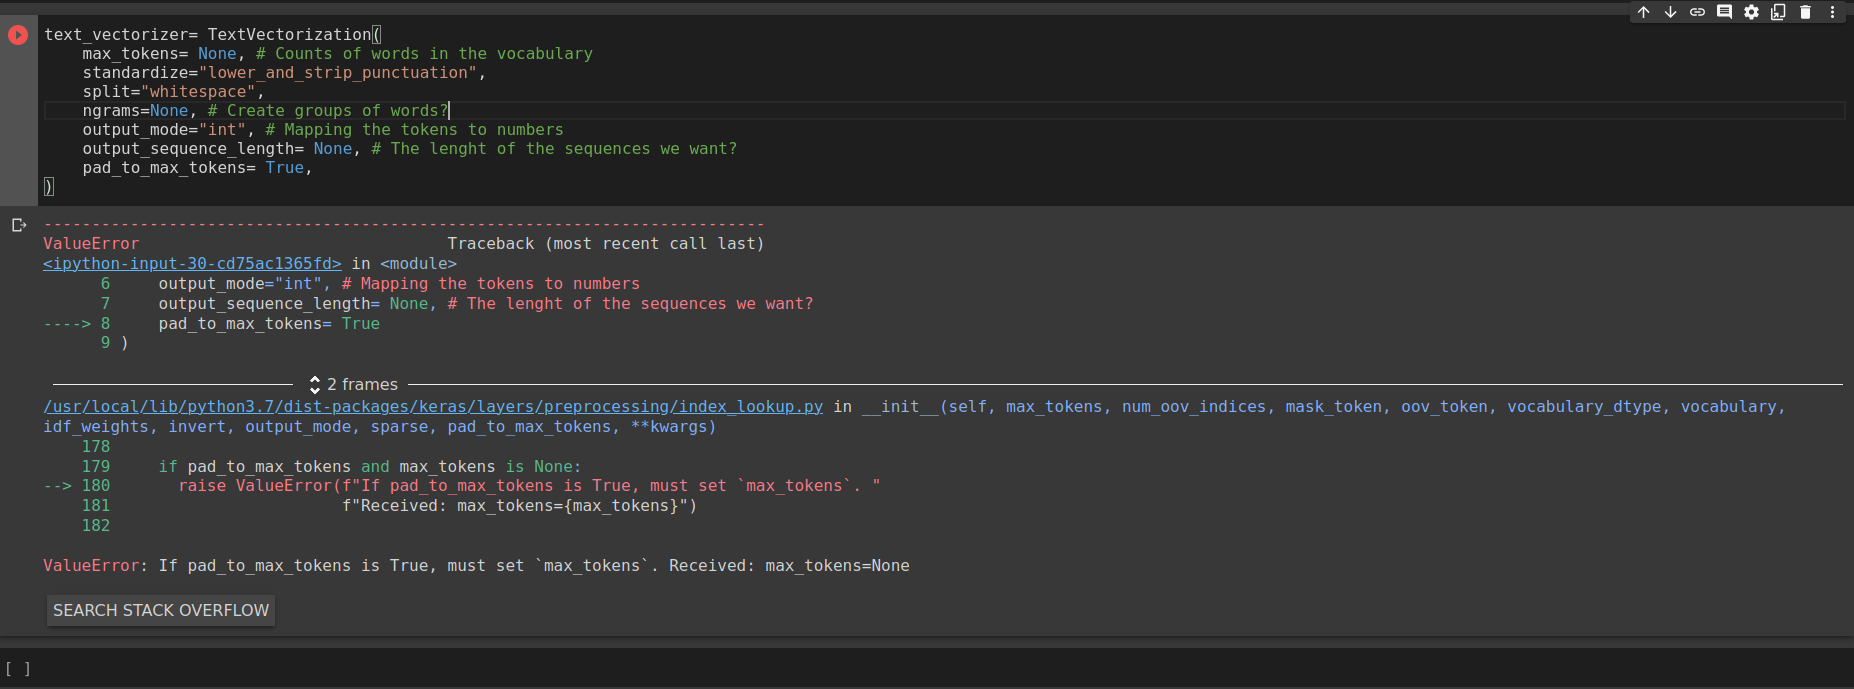

In [21]:
text_vectorizer= TextVectorization(
    max_tokens= 10000, # Counts of words in the vocabulary
    standardize="lower_and_strip_punctuation",  
    split="whitespace", 
    ngrams=None, # Create groups of words?
    output_mode="int", # Mapping the tokens to numbers
    output_sequence_length= None, # The lenght of the sequences we want?
    pad_to_max_tokens= True,
)

In [22]:
text_vectorizer

### Average number of tokens(words) in the training tweets

In [23]:
avg= round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))
avg

15

In [24]:
max_vocab_length= 10000 # Max. number of words to have in our vocabulary
max_length= avg # Max. length our sequences will be.

text_vectorizer= TextVectorization(
    max_tokens= max_vocab_length,
    output_mode= "int",
    output_sequence_length= max_length,
)

## Mapping `TextVectorization` to text data and turning it into numbers

In [25]:
train_sentences

array(["RT @GreenHarvard: Documenting climate change's first major casualty http://t.co/4q4zd7oU34 via @GreenHarvard",
       '#Colorado #News Motorcyclist bicyclist injured in Denver collision on Broadway: At least two people were tak... http://t.co/2iAFPmqJeP',
       "Wreckage 'Conclusively Confirmed' as From MH370: Malaysia PM: Investigators and the families of those who were... http://t.co/VAZpG0ftmU",
       ...,
       "'the fallacy is it is up to the steam roller. It's up to the object whether it will be flattened or not.' #RobertCalifornia #thereisonlysex",
       'The Pak terrorist who has been caught alive must be tried fast not delayed as KasabWe must send very hard message to Pak instead of Biryani',
       "For those that were interested in the gun powder art discussed at the end of 'Introduction to Theological Aesthetic' http://t.co/BZ3iR4GMWj"],
      dtype=object)

In [26]:
text_vectorizer.adapt(train_sentences)

## Sample Sentence and tokenize it

In [27]:
sample_sentence= 'There is a hurrican coming towards my city'
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  76,    9,    3,    1,  222, 2644,   13,  185,    0,    0,    0,
           0,    0,    0,    0]])>

## Choosing random sentences from training data

In [28]:
random_sentence= random.choice(train_sentences)
print(f"Original: {random_sentence}\n")
vectorized_sentence= text_vectorizer([random_sentence])
print(f"Vectorized: {vectorized_sentence}")

Original: Mmmmmm I'm burning.... I'm burning buildings I'm building.... Oooooohhhh oooh ooh...

Vectorized: [[5092   33   83   33   83   89   33  580 4983 4984 3571    0    0    0
     0]]


## Unique words in the vocabulary

In [29]:
common_words= text_vectorizer.get_vocabulary()
common_words

['',
 '[UNK]',
 'the',
 'a',
 'in',
 'to',
 'of',
 'and',
 'i',
 'is',
 'for',
 'on',
 'you',
 'my',
 'with',
 'it',
 'that',
 'at',
 'by',
 'this',
 'from',
 'are',
 'be',
 'was',
 'have',
 'like',
 'me',
 'up',
 'but',
 'so',
 'just',
 'as',
 'amp',
 'im',
 'not',
 'your',
 'out',
 'its',
 'after',
 'an',
 'will',
 'all',
 'no',
 'fire',
 'has',
 'when',
 'if',
 'we',
 'get',
 'now',
 'new',
 'via',
 'more',
 'or',
 'about',
 'they',
 'people',
 'dont',
 'what',
 'news',
 'he',
 'over',
 'one',
 'how',
 'been',
 'who',
 'into',
 'were',
 'can',
 'video',
 'do',
 'us',
 'emergency',
 '2',
 'disaster',
 'than',
 'there',
 'would',
 'police',
 'his',
 'her',
 'still',
 'some',
 'burning',
 'body',
 'back',
 'off',
 'california',
 'crash',
 'buildings',
 'why',
 'storm',
 'day',
 'time',
 'know',
 'man',
 'them',
 'suicide',
 'rt',
 'going',
 'had',
 'got',
 'first',
 'see',
 'nuclear',
 'world',
 'two',
 'our',
 'cant',
 'bomb',
 '3',
 'fires',
 'youtube',
 'attack',
 'love',
 'go',
 'd

In [30]:
len(common_words)

10000

### Top 5 Words

In [31]:
common_words[:5]

['', '[UNK]', 'the', 'a', 'in']

### Least 5 Words

In [32]:
common_words[-5:]

['paramedics', 'paraguay', 'paradise', 'parade', 'paracord']

## Creating embedding using an Embedding layer

> Tensorflow Embedding Layer -> https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding

> Embedding layer parameters

* `input_dim` -> Size of the vocabulary
* `output_dim` -> Size of the output embedding vector, Eg: a value of `100`, means each token gets represented by a vector of `100` long.
* `input_length` -> Length of the sequences being passed to the embedding layer.

In [33]:
from tensorflow.keras import layers

embedding= layers.Embedding(input_dim= max_vocab_length, # Input Shape
                            output_dim=128, # Output Shape
                            input_length= max_length # How long is each input
                            )

In [34]:
embedding

In [35]:
random_sentence= random.choice(train_sentences)
print(f"Original: {random_sentence}\n")

embedded= embedding(text_vectorizer([random_sentence]))
embedded

Original: Militants attack police post in Udhampur; 2 SPOs injured | LiveMint http://t.co/Rptouz2iJs | http://t.co/69mLhfefhr #AllTheNews



<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.01347997, -0.0249184 , -0.04268923, ...,  0.00348558,
         -0.04214016,  0.02850616],
        [ 0.02330431, -0.04361924,  0.01668761, ..., -0.00196227,
         -0.04310456,  0.01058179],
        [ 0.01822902, -0.00837699,  0.01557331, ..., -0.01350479,
          0.01287897, -0.04877576],
        ...,
        [-0.0482543 ,  0.01997025,  0.02899495, ..., -0.01310849,
         -0.03087498, -0.04350834],
        [-0.00217368,  0.00789665,  0.03986761, ..., -0.04435499,
         -0.04993794, -0.03968709],
        [-0.00217368,  0.00789665,  0.03986761, ..., -0.04435499,
         -0.04993794, -0.03968709]]], dtype=float32)>

### Single Token's embeddings

In [36]:
embedded[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([ 0.01347997, -0.0249184 , -0.04268923, -0.00379996, -0.00547372,
        0.01190885, -0.02501273, -0.00724743, -0.00717794,  0.03228596,
       -0.01136273,  0.04873243, -0.00055527, -0.01700934,  0.04850097,
        0.02620143, -0.02193269, -0.02317425, -0.00526778,  0.04373169,
       -0.01583699,  0.02653172, -0.02261694, -0.00889015, -0.00181912,
        0.04066941,  0.04831917, -0.04123097, -0.02888504,  0.00670333,
        0.01218302,  0.03639362, -0.00330747, -0.00328869, -0.04674354,
        0.00447874, -0.03199015, -0.00841645, -0.01666887, -0.02169815,
       -0.04756099,  0.01672356, -0.0098334 , -0.03997117, -0.01192904,
        0.03413675,  0.03066908, -0.04001088,  0.04921735, -0.03497208,
        0.00894325,  0.01895053,  0.00059382, -0.00530184, -0.01221434,
        0.04861143,  0.03172867, -0.0250519 , -0.02163436, -0.04715902,
       -0.01446535, -0.01088088, -0.00439646,  0.01434905, -0.03047254,
       -0.044033

In [37]:
embedded[0][0].shape

TensorShape([128])

In [38]:
random_sentence[0]

'M'

## Conclusion

> Text vectorization or tokenization is converting words to some numerical format. `Creating an embedding` is just making a straight mapping in numerical format that is learnable by the model.

## Modelling on the text dataset

### Experiments

* Naive Bayes(Baseline), Normal ML model
* Feed-Forward Neural Network(Dense model)
* LSTM model(RNN)
* GRU model(RNN)
* Bidirectional-LSTM model(RNN)
* 1D Convolutional Neural Network(CNN)
* Tensorflow Hub pretrained Feature Extractor(Transfer learning in NLP)
* Transfer Learning but with only 10% of the data

### Modelling steps:

* Create a model
* Build a model
* Fit a model
* Evaluate the model

## Model 0: Naive Bayes Model(Baseline)

> It is a common practice to use non-DL algorithms as a baseline because of their speed and later use DL algorithms to improve upon them.

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline


In [40]:
model_0= Pipeline([
    ("tfidf", TfidfVectorizer()), # Converts words into numbers using tfidf
    ("clf", MultinomialNB()) # Model the text
])

model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

### Evaluate the model

In [41]:
baseline_score= model_0.score(val_sentences, val_labels)
print(f"The score of the naive bayes model: {baseline_score}")

The score of the naive bayes model: 0.8333333333333334


### Making predictions

In [42]:
baseline_preds= model_0.predict(val_sentences)
baseline_preds

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,

In [43]:
train_labels

array([1, 1, 1, ..., 0, 1, 0])

#### Predicting the model

In [44]:
from helper_functions import calculate_results, make_confusion_matrix

In [45]:
baseline_result= calculate_results(val_labels, baseline_preds)
baseline_result

{'accuracy': 83.33333333333334,
 'precision': 0.8412202657738648,
 'recall': 0.8333333333333334,
 'f1': 0.8293755882702342}

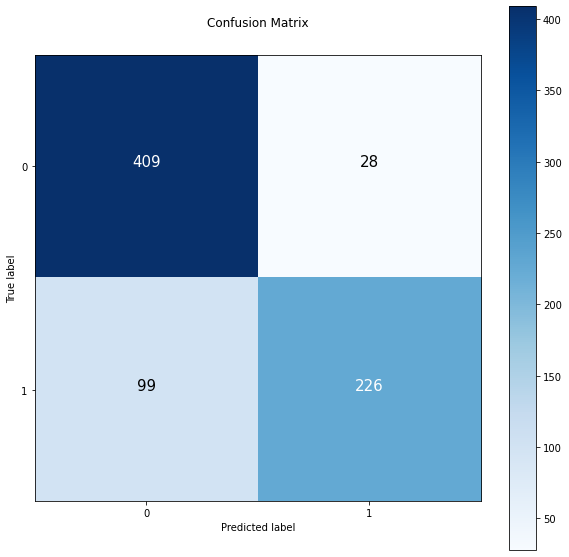

In [46]:
make_confusion_matrix(val_labels, baseline_preds)

In [47]:
409 + 28

437

In [48]:
99 + 206

305

## Model 1: A simple Dense Model

### Tensorflow Callback

In [49]:
from helper_functions import create_tensorboard_callback

SAVE_DIR='model_logs'

### Model Building

In [50]:
from tensorflow.keras import layers
inputs= layers.Input(shape=(1,), dtype= tf.string) # Inputs are 1-dimensional string
x= text_vectorizer(inputs) # Converting the string into numbers
x= embedding(x) # Create an embedding of the numberized inputs
x= layers.GlobalAveragePooling1D(name="global_avrage_pooling")(x) # Condense the feature vector for each token to one vector
outputs= layers.Dense(1, activation="sigmoid")(x) # Create an output layer, and it is a binary classification model
model_1= tf.keras.Model(inputs, outputs, name="model_1_dense")

In [51]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_avrage_pooling (Glob  (None, 128)              0         
 alAveragePooling1D)                                             
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [52]:
model_1.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer= tf.keras.optimizers.Adam())

In [53]:
history_1 = model_1.fit(train_sentences,
                        train_labels, 
                        epochs=10,
                        validation_data=(val_sentences, val_labels),
                        callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                               experiment_name="model_1_dense")])

Saving TensorBoard log files to: model_logs/model_1_dense/20220823-112202
Epoch 1/10
215/215 [==============================] - 8s 9ms/step - loss: 0.6125 - accuracy: 0.6920 - val_loss: 0.5098 - val_accuracy: 0.8071
Epoch 2/10
215/215 [==============================] - 2s 8ms/step - loss: 0.4464 - accuracy: 0.8132 - val_loss: 0.4339 - val_accuracy: 0.8255
Epoch 3/10
215/215 [==============================] - 2s 7ms/step - loss: 0.3505 - accuracy: 0.8589 - val_loss: 0.4180 - val_accuracy: 0.8346
Epoch 4/10
215/215 [==============================] - 1s 4ms/step - loss: 0.2872 - accuracy: 0.8886 - val_loss: 0.4241 - val_accuracy: 0.8386
Epoch 5/10
215/215 [==============================] - 1s 4ms/step - loss: 0.2397 - accuracy: 0.9098 - val_loss: 0.4420 - val_accuracy: 0.8294
Epoch 6/10
215/215 [==============================] - 1s 5ms/step - loss: 0.2018 - accuracy: 0.9280 - val_loss: 0.4736 - val_accuracy: 0.8228
Epoch 7/10
215/215 [==============================] - 1s 4ms/step - loss: 

In [54]:
model_1_score=model_1.evaluate(val_sentences, val_labels)
model_1_score

24/24 [==============================] - 0s 3ms/step - loss: 0.6077 - accuracy: 0.7940


[0.6077348589897156, 0.7939632534980774]

In [55]:
baseline_score

0.8333333333333334

In [56]:
model_1_pred_probs= model_1.predict(val_sentences)
model_1_pred_probs.shape

(762, 1)

In [57]:
model_1_pred_probs[:5]

array([[9.9997342e-01],
       [1.1445120e-01],
       [6.0711667e-02],
       [9.0586060e-01],
       [4.9167571e-05]], dtype=float32)

### Converting model prediction probabilites to label format

In [58]:
model_1_preds= tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 0., 1., 0., 0., 1., 0., 1., 0.], dtype=float32)>

In [59]:
val_labels[:10]

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0])

### Evaluating the model

In [60]:
model_1_results= calculate_results(val_labels, model_1_preds)
model_1_results

{'accuracy': 79.39632545931758,
 'precision': 0.7938840217271167,
 'recall': 0.7939632545931758,
 'f1': 0.7939222558659366}

In [61]:
baseline_result

{'accuracy': 83.33333333333334,
 'precision': 0.8412202657738648,
 'recall': 0.8333333333333334,
 'f1': 0.8293755882702342}

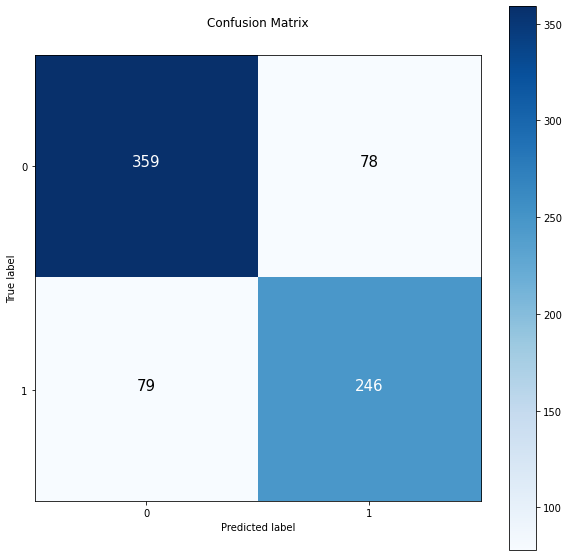

In [62]:
make_confusion_matrix(val_labels, model_1_preds)

## Visualizing learned embeddings

In [63]:
words_in_vocab= text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [64]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_avrage_pooling (Glob  (None, 128)              0         
 alAveragePooling1D)                                             
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

### Weight matrix of embedding layer

> These are the numerical representation of each token in the training data, which have been learning from the ~10 epochs of the model.

In [65]:
embed_weights= model_1.get_layer('embedding').get_weights()
embed_weights

[array([[-0.0140279 , -0.0034257 ,  0.05139008, ..., -0.05523353,
         -0.06261075, -0.04265448],
        [-0.04795026,  0.02038551,  0.02865973, ..., -0.01213553,
         -0.03139058, -0.04980133],
        [-0.00734275, -0.0008282 ,  0.05141877, ...,  0.01692976,
         -0.01046807,  0.01167091],
        ...,
        [-0.05217512, -0.11046517,  0.083157  , ..., -0.06062643,
         -0.0387755 ,  0.06706171],
        [ 0.00767376,  0.01422627, -0.04281558, ..., -0.01168462,
          0.03626132, -0.03547091],
        [-0.02968079, -0.06882388,  0.08575596, ..., -0.03591692,
         -0.06453995,  0.06967373]], dtype=float32)]

In [66]:
embed_weights[0]

array([[-0.0140279 , -0.0034257 ,  0.05139008, ..., -0.05523353,
        -0.06261075, -0.04265448],
       [-0.04795026,  0.02038551,  0.02865973, ..., -0.01213553,
        -0.03139058, -0.04980133],
       [-0.00734275, -0.0008282 ,  0.05141877, ...,  0.01692976,
        -0.01046807,  0.01167091],
       ...,
       [-0.05217512, -0.11046517,  0.083157  , ..., -0.06062643,
        -0.0387755 ,  0.06706171],
       [ 0.00767376,  0.01422627, -0.04281558, ..., -0.01168462,
         0.03626132, -0.03547091],
       [-0.02968079, -0.06882388,  0.08575596, ..., -0.03591692,
        -0.06453995,  0.06967373]], dtype=float32)

In [67]:
embed_weights= model_1.get_layer('embedding').get_weights()[0]
embed_weights

array([[-0.0140279 , -0.0034257 ,  0.05139008, ..., -0.05523353,
        -0.06261075, -0.04265448],
       [-0.04795026,  0.02038551,  0.02865973, ..., -0.01213553,
        -0.03139058, -0.04980133],
       [-0.00734275, -0.0008282 ,  0.05141877, ...,  0.01692976,
        -0.01046807,  0.01167091],
       ...,
       [-0.05217512, -0.11046517,  0.083157  , ..., -0.06062643,
        -0.0387755 ,  0.06706171],
       [ 0.00767376,  0.01422627, -0.04281558, ..., -0.01168462,
         0.03626132, -0.03547091],
       [-0.02968079, -0.06882388,  0.08575596, ..., -0.03591692,
        -0.06453995,  0.06967373]], dtype=float32)

In [68]:
embed_weights[0].shape

(128,)

### Tensorflow Word Embedding Visualization

* Tensorflow Projector -> https://projector.tensorflow.org/
* Tensorflow Word Embeddings Docs -> https://www.tensorflow.org/text/guide/word_embeddings

#### Embedding Files

In [69]:
import io
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()


### Downloading files from colab to upload to projector

In [70]:
try:
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Recurrent Neural Network(RNN)

> RNN are useful for sequence data.

> The premise of a recurrent neural network is to use the representation of a previous input to aid the representation of a later input.

### Resources

* Link -> https://github.com/mrdbourke/tensorflow-deep-learning#-08-introduction-to-nlp-natural-language-processing-in-tensorflow-exercises

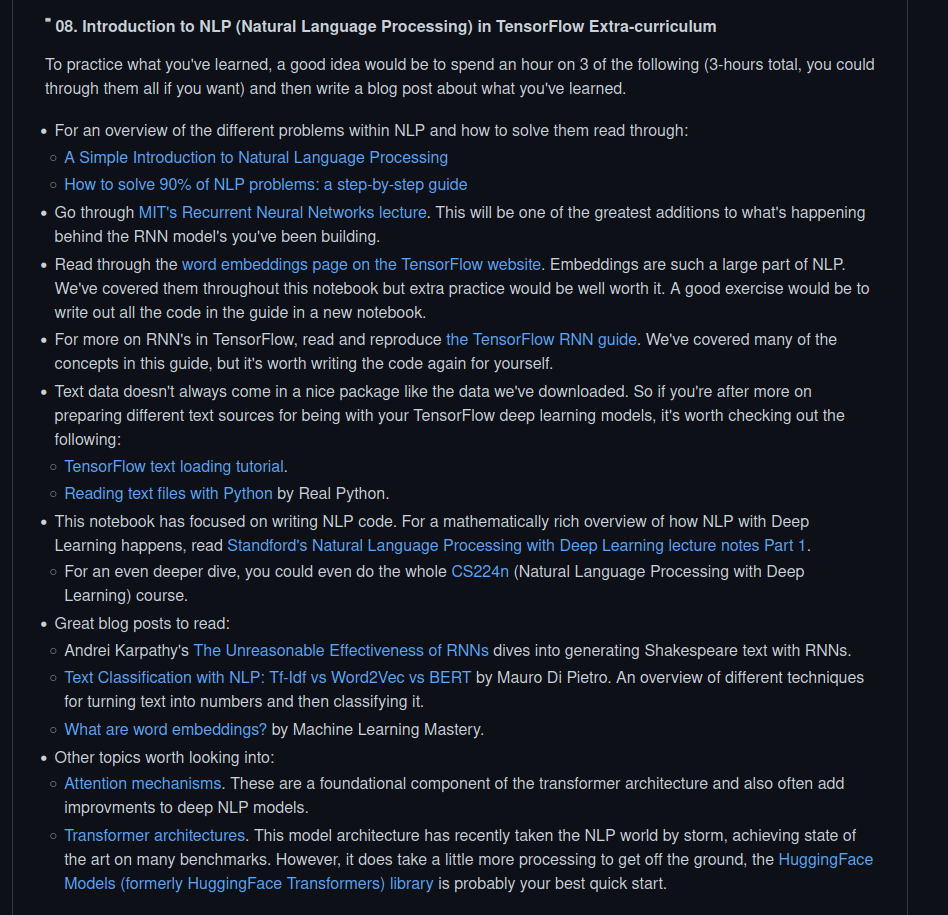

## Model 2: LSTM(RNN)

* LSTM: `Long Short Term Memory`


### Typical Structure of an RNN:

``` 
Input(text) -> Tokenize(text_vectorizer) -> Embedding(Embedding Layer) -> Layers(RNNs/Dense) -> Output(Label probability)

```

### LSTM Model

In [71]:
from tensorflow.keras import layers

inputs= layers.Input(shape=(1,), dtype="string")
x= text_vectorizer(inputs)
x= embedding(x)
x= layers.LSTM(64, return_sequences=True)(x) # When we're stacking RNN cells together, we need to set 'return_sequences' parameter to 'True', `return_sequences=True`, otherwise we will get an error.
x= layers.LSTM(64)(x)
x= layers.Dense(64, activation="relu")(x)
outputs= layers.Dense(1, activation="sigmoid", name="output_layer")(x)
model_2= tf.keras.Model(inputs, outputs, name="model_2_LSTM")

In [72]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 15, 64)            49408     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                      

### Compile the model

In [73]:
model_2.compile(loss="binary_crossentropy", optimizer= tf.keras.optimizers.Adam(), metrics=["accuracy"])

In [74]:
### Fit the model

In [75]:
history_2= model_2.fit(train_sentences, train_labels, epochs=10, validation_data=(val_sentences, val_labels), callbacks=[create_tensorboard_callback(SAVE_DIR, "model_2_LSTM")])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20220823-112227
Epoch 1/10
215/215 [==============================] - 8s 12ms/step - loss: 0.1386 - accuracy: 0.9521 - val_loss: 0.6998 - val_accuracy: 0.7743
Epoch 2/10
215/215 [==============================] - 2s 9ms/step - loss: 0.0905 - accuracy: 0.9670 - val_loss: 0.8627 - val_accuracy: 0.7795
Epoch 3/10
215/215 [==============================] - 2s 9ms/step - loss: 0.0828 - accuracy: 0.9692 - val_loss: 0.7871 - val_accuracy: 0.7769
Epoch 4/10
215/215 [==============================] - 2s 8ms/step - loss: 0.0697 - accuracy: 0.9710 - val_loss: 1.1316 - val_accuracy: 0.7756
Epoch 5/10
215/215 [==============================] - 2s 8ms/step - loss: 0.0592 - accuracy: 0.9764 - val_loss: 0.9296 - val_accuracy: 0.7874
Epoch 6/10
215/215 [==============================] - 2s 8ms/step - loss: 0.0522 - accuracy: 0.9768 - val_loss: 1.3335 - val_accuracy: 0.7835
Epoch 7/10
215/215 [==============================] - 2s 8ms/step - loss: 

### Prediction Probabilities

In [76]:
model_2_pred_probs= model_2.predict(val_sentences)
model_2_pred_probs[:5]

array([[9.99997973e-01],
       [7.29169697e-04],
       [1.02431826e-04],
       [9.91177440e-01],
       [6.64565732e-06]], dtype=float32)

In [77]:
val_labels

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [78]:
model_2_preds= tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1

In [79]:
model_2_results= calculate_results(val_labels,model_2_preds)
model_2_results

{'accuracy': 77.82152230971128,
 'precision': 0.7772438371674129,
 'recall': 0.7782152230971129,
 'f1': 0.777235562114064}

In [80]:
baseline_result

{'accuracy': 83.33333333333334,
 'precision': 0.8412202657738648,
 'recall': 0.8333333333333334,
 'f1': 0.8293755882702342}

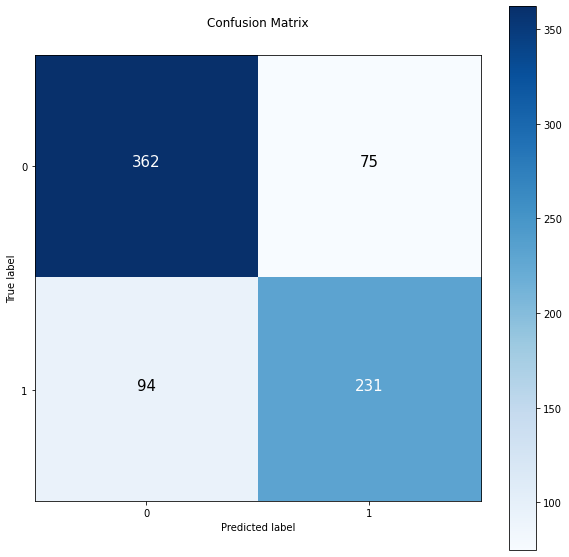

In [81]:
make_confusion_matrix(val_labels,model_2_preds)

## Model 3: GRU(RNN)

* GRU -> Gated Recurrent Unit

* Docs -> https://www.tensorflow.org/api_docs/python/tf/keras/layers/GRU

In [82]:
from tensorflow.keras import layers

inputs= layers.Input(shape=(1,), dtype="string")
x= text_vectorizer(inputs)
x= embedding(x)
x= layers.GRU(64, return_sequences=True)(x) 
x= layers.GRU(64)(x)
x= layers.Dense(64, activation="relu")(x)
outputs= layers.Dense(1, activation="sigmoid", name="output_layer")(x)
model_3= tf.keras.Model(inputs, outputs, name="model_3_GRU")

In [83]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 15, 64)            37248     
                                                                 
 gru_1 (GRU)                 (None, 64)                24960     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                       

In [84]:
model_3.compile(loss="binary_crossentropy", optimizer= tf.keras.optimizers.Adam(), metrics=["accuracy"])
history_3= model_3.fit(train_sentences, train_labels, epochs=10, validation_data=(val_sentences, val_labels), callbacks=[create_tensorboard_callback(SAVE_DIR, "model_3_GRU")])

Saving TensorBoard log files to: model_logs/model_3_GRU/20220823-112312
Epoch 1/10
215/215 [==============================] - 5s 10ms/step - loss: 0.1175 - accuracy: 0.9587 - val_loss: 0.9263 - val_accuracy: 0.7520
Epoch 2/10
215/215 [==============================] - 2s 8ms/step - loss: 0.0540 - accuracy: 0.9768 - val_loss: 1.4657 - val_accuracy: 0.7559
Epoch 3/10
215/215 [==============================] - 2s 8ms/step - loss: 0.0451 - accuracy: 0.9766 - val_loss: 1.3897 - val_accuracy: 0.7559
Epoch 4/10
215/215 [==============================] - 2s 8ms/step - loss: 0.0426 - accuracy: 0.9781 - val_loss: 1.6920 - val_accuracy: 0.7743
Epoch 5/10
215/215 [==============================] - 2s 8ms/step - loss: 0.0416 - accuracy: 0.9791 - val_loss: 1.4104 - val_accuracy: 0.7598
Epoch 6/10
215/215 [==============================] - 2s 8ms/step - loss: 0.0394 - accuracy: 0.9804 - val_loss: 1.6779 - val_accuracy: 0.7717
Epoch 7/10
215/215 [==============================] - 2s 8ms/step - loss: 0

In [85]:
model_3_pred_probs= model_3.predict(val_sentences)
model_3_pred_probs[:5]

array([[9.9999499e-01],
       [2.0941643e-03],
       [5.1215733e-04],
       [9.9994731e-01],
       [3.1203312e-05]], dtype=float32)

In [86]:
model_3_preds= tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1

In [87]:
model_3_results= calculate_results(val_labels,model_3_preds)
model_3_results

{'accuracy': 76.24671916010499,
 'precision': 0.7615514727325753,
 'recall': 0.7624671916010499,
 'f1': 0.7617840449924433}

In [88]:
model_2_results

{'accuracy': 77.82152230971128,
 'precision': 0.7772438371674129,
 'recall': 0.7782152230971129,
 'f1': 0.777235562114064}

In [89]:
baseline_result

{'accuracy': 83.33333333333334,
 'precision': 0.8412202657738648,
 'recall': 0.8333333333333334,
 'f1': 0.8293755882702342}

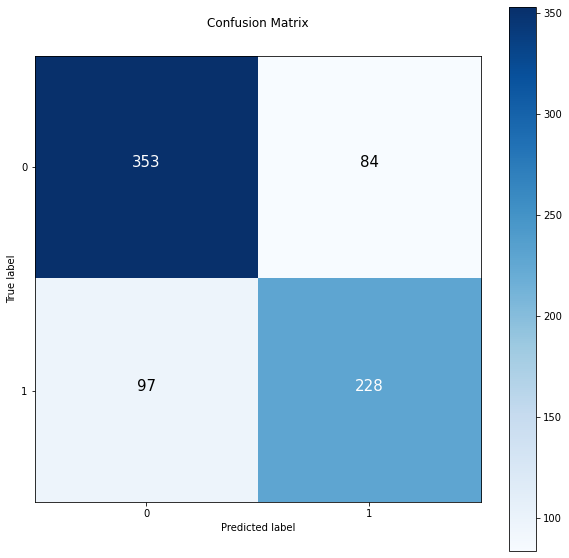

In [90]:
make_confusion_matrix(val_labels,model_3_preds)

### Model 3_1: GRU(RNN)

In [91]:
from tensorflow.keras import layers

inputs= layers.Input(shape=(1,), dtype="string")
x= text_vectorizer(inputs)
x= embedding(x)
x= layers.GRU(64, return_sequences=True)(x) 
x= layers.LSTM(64, return_sequences=True)(x) 
x= layers.LSTM(64, return_sequences=True)(x) 
x= layers.GRU(64)(x)
x= layers.Dense(64, activation="relu")(x)
outputs= layers.Dense(1, activation="sigmoid", name="output_layer")(x)
model_3_1= tf.keras.Model(inputs, outputs, name="model_3_1_GRU")

In [92]:
model_3_1.summary()

Model: "model_3_1_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru_2 (GRU)                 (None, 15, 64)            37248     
                                                                 
 lstm_2 (LSTM)               (None, 15, 64)            33024     
                                                                 
 lstm_3 (LSTM)               (None, 15, 64)            33024     
                                                     

In [93]:
model_3_1.compile(loss="binary_crossentropy", optimizer= tf.keras.optimizers.Adam(), metrics=["accuracy"])
history_3_1= model_3_1.fit(train_sentences, train_labels, epochs=10, validation_data=(val_sentences, val_labels), callbacks=[create_tensorboard_callback(SAVE_DIR, "model_3_1_GRU")])

Saving TensorBoard log files to: model_logs/model_3_1_GRU/20220823-112337
Epoch 1/10
215/215 [==============================] - 9s 17ms/step - loss: 0.1145 - accuracy: 0.9599 - val_loss: 1.0795 - val_accuracy: 0.7585
Epoch 2/10
215/215 [==============================] - 2s 11ms/step - loss: 0.0469 - accuracy: 0.9785 - val_loss: 1.3595 - val_accuracy: 0.7559
Epoch 3/10
215/215 [==============================] - 2s 11ms/step - loss: 0.0412 - accuracy: 0.9788 - val_loss: 1.3481 - val_accuracy: 0.7664
Epoch 4/10
215/215 [==============================] - 2s 11ms/step - loss: 0.0397 - accuracy: 0.9810 - val_loss: 1.6844 - val_accuracy: 0.7703
Epoch 5/10
215/215 [==============================] - 2s 11ms/step - loss: 0.0356 - accuracy: 0.9816 - val_loss: 1.6069 - val_accuracy: 0.7598
Epoch 6/10
215/215 [==============================] - 2s 11ms/step - loss: 0.0396 - accuracy: 0.9785 - val_loss: 1.8303 - val_accuracy: 0.7598
Epoch 7/10
215/215 [==============================] - 2s 11ms/step -

In [94]:
model_3_1_pred_probs= model_3_1.predict(val_sentences)
model_3_1_pred_probs[:5]

array([[9.9999607e-01],
       [1.0884117e-04],
       [2.4444322e-05],
       [9.9895465e-01],
       [8.8902661e-06]], dtype=float32)

In [95]:
model_3_1_preds= tf.squeeze(tf.round(model_3_1_pred_probs))
model_3_1_preds

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1

In [96]:
model_3_1_results= calculate_results(val_labels,model_3_1_preds)
model_3_1_results

{'accuracy': 76.9028871391076,
 'precision': 0.7679190800043413,
 'recall': 0.7690288713910761,
 'f1': 0.767818781808325}

In [97]:
model_3_results

{'accuracy': 76.24671916010499,
 'precision': 0.7615514727325753,
 'recall': 0.7624671916010499,
 'f1': 0.7617840449924433}

In [98]:
baseline_result

{'accuracy': 83.33333333333334,
 'precision': 0.8412202657738648,
 'recall': 0.8333333333333334,
 'f1': 0.8293755882702342}

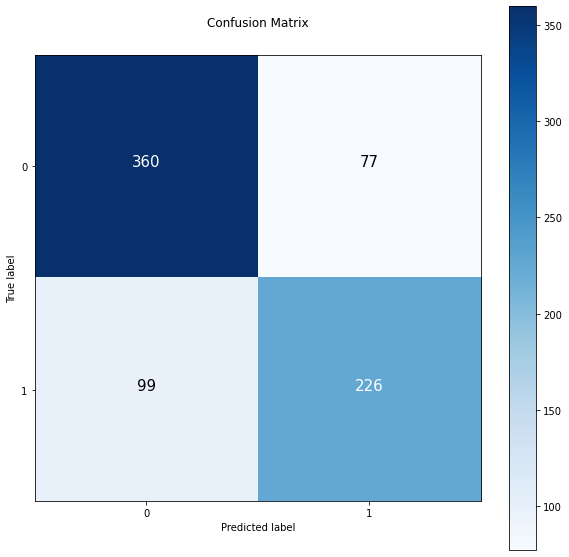

In [99]:
make_confusion_matrix(val_labels,model_3_1_preds)

## Model 4: Bidirectional LSTM(RNN)

> Normal RNN's go from left to right(Like we read an English sentence from left to right), however, a bidirectional RNN goes from right to left as well as lef to right.

* Docs -> https://www.tensorflow.org/api_docs/python/tf/keras/layers/Bidirectional

In [100]:
from tensorflow.keras import layers

inputs= layers.Input(shape=(1,), dtype="string")
x= text_vectorizer(inputs)
x= embedding(x)
x= layers.Bidirectional(layers.GRU(64, return_sequences=True))(x) 
x= layers.Bidirectional(layers.GRU(64))(x)
x= layers.Dense(64, activation="relu")(x)
outputs= layers.Dense(1, activation="sigmoid", name="output_layer")(x)
model_4= tf.keras.Model(inputs, outputs, name="model_4_Bidirectional_GRU")

In [101]:
model_4.summary()

Model: "model_4_Bidirectional_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 15, 128)          74496     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              74496     
 nal)                                                            
                                         

In [102]:
model_4.compile(loss="binary_crossentropy", optimizer= tf.keras.optimizers.Adam(), metrics=["accuracy"])
history_4= model_4.fit(train_sentences, train_labels, epochs=10, validation_data=(val_sentences, val_labels), callbacks=[create_tensorboard_callback(SAVE_DIR, "model_4_bidirectional_gru")])

Saving TensorBoard log files to: model_logs/model_4_bidirectional_gru/20220823-112411
Epoch 1/10
215/215 [==============================] - 9s 17ms/step - loss: 0.0818 - accuracy: 0.9698 - val_loss: 1.4838 - val_accuracy: 0.7533
Epoch 2/10
215/215 [==============================] - 2s 11ms/step - loss: 0.0388 - accuracy: 0.9801 - val_loss: 2.1071 - val_accuracy: 0.7585
Epoch 3/10
215/215 [==============================] - 2s 11ms/step - loss: 0.0359 - accuracy: 0.9803 - val_loss: 2.2156 - val_accuracy: 0.7415
Epoch 4/10
215/215 [==============================] - 2s 11ms/step - loss: 0.0382 - accuracy: 0.9806 - val_loss: 1.4984 - val_accuracy: 0.7585
Epoch 5/10
215/215 [==============================] - 2s 11ms/step - loss: 0.0366 - accuracy: 0.9822 - val_loss: 2.1586 - val_accuracy: 0.7598
Epoch 6/10
215/215 [==============================] - 2s 12ms/step - loss: 0.0312 - accuracy: 0.9828 - val_loss: 2.5609 - val_accuracy: 0.7388
Epoch 7/10
215/215 [==============================] - 4s

In [103]:
model_4_pred_probs= model_4.predict(val_sentences)
model_4_preds= tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1

In [104]:
model_4_results= calculate_results(val_labels,model_4_preds)
model_4_results

{'accuracy': 75.32808398950131,
 'precision': 0.7530931107993892,
 'recall': 0.7532808398950132,
 'f1': 0.753181743327239}

In [105]:
baseline_result

{'accuracy': 83.33333333333334,
 'precision': 0.8412202657738648,
 'recall': 0.8333333333333334,
 'f1': 0.8293755882702342}

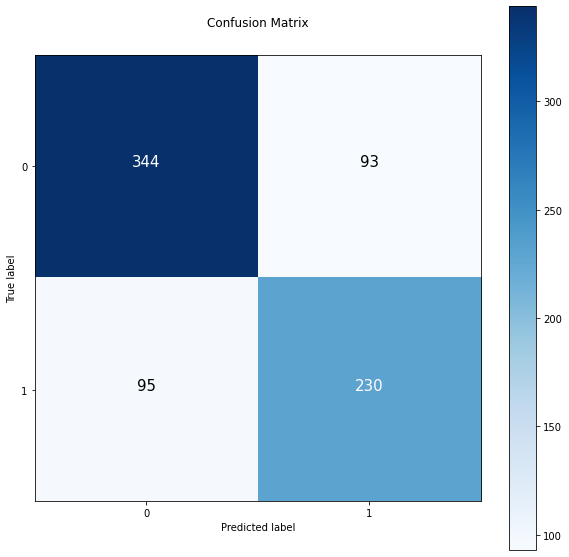

In [106]:
make_confusion_matrix(val_labels,model_4_preds)

### Model 4_1: Bidirectional LSTM(RNN)

In [107]:
from tensorflow.keras import layers

inputs= layers.Input(shape=(1,), dtype="string")
x= text_vectorizer(inputs)
x= embedding(x)
x= layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x) 
x= layers.Bidirectional(layers.GRU(64, return_sequences=True))(x)
x= layers.Bidirectional(layers.GRU(64, return_sequences=True))(x)  
x= layers.Bidirectional(layers.LSTM(64))(x)
x= layers.Dense(64, activation="relu")(x)
outputs= layers.Dense(1, activation="sigmoid", name="output_layer")(x)
model_4_1= tf.keras.Model(inputs, outputs, name="model_4_Bidirectional_LSTM")

In [108]:
model_4_1.summary()

Model: "model_4_Bidirectional_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional_2 (Bidirectio  (None, 15, 128)          98816     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 15, 128)          74496     
 nal)                                                            
                                        

In [109]:
model_4_1.compile(loss="binary_crossentropy", optimizer= tf.keras.optimizers.Adam(), metrics=["accuracy"])
history_4_1= model_4_1.fit(train_sentences, train_labels, epochs=10, validation_data=(val_sentences, val_labels), callbacks=[create_tensorboard_callback(SAVE_DIR, "model_4_bidirectional_lstm")])

Saving TensorBoard log files to: model_logs/model_4_bidirectional_lstm/20220823-112451
Epoch 1/10
215/215 [==============================] - 17s 30ms/step - loss: 0.0708 - accuracy: 0.9737 - val_loss: 1.6853 - val_accuracy: 0.7493
Epoch 2/10
215/215 [==============================] - 4s 20ms/step - loss: 0.0381 - accuracy: 0.9812 - val_loss: 1.7245 - val_accuracy: 0.7493
Epoch 3/10
215/215 [==============================] - 5s 21ms/step - loss: 0.0407 - accuracy: 0.9809 - val_loss: 1.8288 - val_accuracy: 0.7388
Epoch 4/10
215/215 [==============================] - 5s 23ms/step - loss: 0.0367 - accuracy: 0.9831 - val_loss: 1.3484 - val_accuracy: 0.7520
Epoch 5/10
215/215 [==============================] - 4s 20ms/step - loss: 0.0321 - accuracy: 0.9828 - val_loss: 1.6759 - val_accuracy: 0.7507
Epoch 6/10
215/215 [==============================] - 4s 19ms/step - loss: 0.0455 - accuracy: 0.9793 - val_loss: 1.3549 - val_accuracy: 0.7533
Epoch 7/10
215/215 [==============================] - 

In [110]:
model_4_1_pred_probs= model_4_1.predict(val_sentences)
model_4_1_preds= tf.squeeze(tf.round(model_4_1_pred_probs))
model_4_1_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([1., 0., 0., 1., 0.], dtype=float32)>

In [111]:
model_4_1_results= calculate_results(val_labels,model_4_1_preds)
model_4_1_results

{'accuracy': 74.93438320209974,
 'precision': 0.7506333385263462,
 'recall': 0.7493438320209974,
 'f1': 0.7498320122644654}

In [112]:
model_3_results

{'accuracy': 76.24671916010499,
 'precision': 0.7615514727325753,
 'recall': 0.7624671916010499,
 'f1': 0.7617840449924433}

In [113]:
model_3_1_results

{'accuracy': 76.9028871391076,
 'precision': 0.7679190800043413,
 'recall': 0.7690288713910761,
 'f1': 0.767818781808325}

In [114]:
baseline_result

{'accuracy': 83.33333333333334,
 'precision': 0.8412202657738648,
 'recall': 0.8333333333333334,
 'f1': 0.8293755882702342}

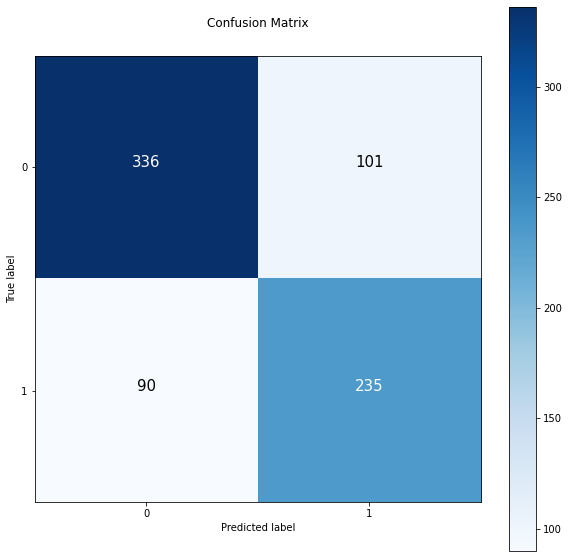

In [115]:
make_confusion_matrix(val_labels,model_4_1_preds)

## Model 5: 1D CNN or 1-dimensional Convolutional Neural Network

* Structure of a Conv1D model of sequences(`Text` here)

* Docs -> https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv1D

``` 
Inputs(Text) -> Tokenization -> Embedding -> Layer(Conv1D + Pooling Layer) -> Outputs(Class Probabilities
```

In [116]:
# Test out the embedding, 1D convolutional and max pooling

embedding_test = embedding(text_vectorizer(["this is a test sentence"])) # turn target sentence into embedding

conv_1d = layers.Conv1D(filters=32, kernel_size=5, activation="relu", padding="valid") # convolve over target sequence 5 words at a time
conv_1d_output = conv_1d(embedding_test) # pass embedding through 1D convolutional layer

max_pool = layers.GlobalMaxPool1D() 
max_pool_output = max_pool(conv_1d_output) # get the most important features

embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [117]:
# Test out the embedding, 1D convolutional and max pooling

embedding_test = embedding(text_vectorizer(["this is a test sentence"])) # turn target sentence into embedding

conv_1d = layers.Conv1D(filters=32, kernel_size=5, activation="relu", padding="same") # convolve over target sequence 5 words at a time
conv_1d_output = conv_1d(embedding_test) # pass embedding through 1D convolutional layer

max_pool = layers.GlobalMaxPool1D() 
max_pool_output = max_pool(conv_1d_output) # get the most important features

embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 15, 32]), TensorShape([1, 32]))

In [118]:
embedding_test

<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.0738354 , -0.18226922,  0.11778907, ..., -0.10109745,
         -0.09991711,  0.00418872],
        [ 0.0011922 ,  0.01353771,  0.02159892, ..., -0.06167169,
         -0.06371535,  0.0489255 ],
        [-0.05751308, -0.03705279,  0.05553976, ...,  0.00073248,
         -0.02253801, -0.02792324],
        ...,
        [-0.01729952, -0.01166676,  0.02442492, ..., -0.01972124,
         -0.02629083, -0.00364207],
        [-0.01729952, -0.01166676,  0.02442492, ..., -0.01972124,
         -0.02629083, -0.00364207],
        [-0.01729952, -0.01166676,  0.02442492, ..., -0.01972124,
         -0.02629083, -0.00364207]]], dtype=float32)>

In [119]:
conv_1d_output

<tf.Tensor: shape=(1, 15, 32), dtype=float32, numpy=
array([[[3.48180868e-02, 1.75203849e-02, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 5.61129749e-02, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 9.99216083e-03, 0.00000000e+00, 0.00000000e+00,
         1.67924352e-02, 2.90980209e-02, 2.63427235e-02, 0.00000000e+00,
         1.44328112e-02, 0.00000000e+00, 3.01440805e-02, 0.00000000e+00,
         0.00000000e+00, 1.40927937e-02, 7.14573786e-02, 0.00000000e+00,
         2.87511759e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.47823769e-02,
         0.00000000e+00, 5.18311113e-02, 0.00000000e+00, 8.29964690e-03,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 8.23346525e-02, 3.68699655e-02, 0.00000000e+00,
         0.00000000e+00, 2.44704485e-02, 5.44071309e-02, 0.00000000e+0

In [120]:
max_pool_output

<tf.Tensor: shape=(1, 32), dtype=float32, numpy=
array([[0.0601723 , 0.07205208, 0.04486341, 0.1016075 , 0.0110851 ,
        0.06402112, 0.06814456, 0.13357535, 0.04637753, 0.01681992,
        0.05972937, 0.02252657, 0.07328798, 0.08233465, 0.03686997,
        0.07061337, 0.01679244, 0.03063046, 0.16721103, 0.05878628,
        0.01443281, 0.04835186, 0.06575464, 0.1387606 , 0.1130563 ,
        0.054249  , 0.07145738, 0.1157966 , 0.11940524, 0.00454639,
        0.11568755, 0.14220494]], dtype=float32)>

### Building Conv1D CNN model

In [121]:
from tensorflow.keras import layers

inputs= layers.Input(shape=(1,), dtype="string")
x= text_vectorizer(inputs)
x= embedding(x)
x=layers.Conv1D(64, 5, padding="valid", activation="relu", strides=2)(x)
x=layers.GlobalMaxPooling1D(name="global_max_pooling1D")(x)
x= layers.Dense(64, activation="relu")(x)
outputs= layers.Dense(1, activation="sigmoid", name="output_layer")(x)
model_5= tf.keras.Model(inputs, outputs, name="model_5_1D_CNN")

In [122]:
model_5.summary()

Model: "model_5_1D_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d_2 (Conv1D)           (None, 6, 64)             41024     
                                                                 
 global_max_pooling1D (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_6 (Dense)             (None, 64)             

In [123]:
model_5.compile(loss="binary_crossentropy", optimizer= tf.keras.optimizers.Adam(), metrics=["accuracy"])
history_5= model_5.fit(train_sentences, train_labels, epochs=10, validation_data=(val_sentences, val_labels), callbacks=[create_tensorboard_callback(SAVE_DIR, "model_5_1D_CNN")])

Saving TensorBoard log files to: model_logs/model_5_1D_CNN/20220823-112634
Epoch 1/10
215/215 [==============================] - 5s 10ms/step - loss: 0.1063 - accuracy: 0.9688 - val_loss: 1.1505 - val_accuracy: 0.7612
Epoch 2/10
215/215 [==============================] - 2s 8ms/step - loss: 0.0510 - accuracy: 0.9761 - val_loss: 1.3631 - val_accuracy: 0.7402
Epoch 3/10
215/215 [==============================] - 2s 7ms/step - loss: 0.0382 - accuracy: 0.9825 - val_loss: 1.5715 - val_accuracy: 0.7480
Epoch 4/10
215/215 [==============================] - 1s 5ms/step - loss: 0.0328 - accuracy: 0.9823 - val_loss: 1.7650 - val_accuracy: 0.7454
Epoch 5/10
215/215 [==============================] - 1s 5ms/step - loss: 0.0309 - accuracy: 0.9832 - val_loss: 1.9114 - val_accuracy: 0.7415
Epoch 6/10
215/215 [==============================] - 1s 5ms/step - loss: 0.0297 - accuracy: 0.9828 - val_loss: 2.0860 - val_accuracy: 0.7467
Epoch 7/10
215/215 [==============================] - 1s 5ms/step - loss

In [124]:
model_5_pred_probs= model_5.predict(val_sentences)
model_5_preds= tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([1., 0., 0., 0., 0.], dtype=float32)>

In [125]:
model_5_results= calculate_results(val_labels,model_5_preds)
model_5_results

{'accuracy': 74.1469816272966,
 'precision': 0.7433620386244583,
 'recall': 0.7414698162729659,
 'f1': 0.7421283218220356}

In [126]:
baseline_result

{'accuracy': 83.33333333333334,
 'precision': 0.8412202657738648,
 'recall': 0.8333333333333334,
 'f1': 0.8293755882702342}

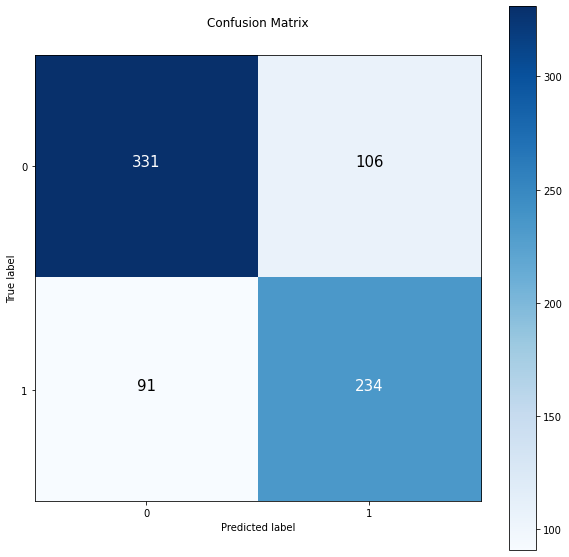

In [127]:
make_confusion_matrix(val_labels,model_5_preds)

## Model 6: Transfer Learning Feature Extractor Model from Tensorflow Hub

### Trying it out

* Model Link -> https://tfhub.dev/google/universal-sentence-encoder/4


In [128]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embeddings = embed(["The quick brown fox jumps over the lazy dog.", "I am a sentence for which I would like to get its embedding"])

print(embeddings)

# The following are example embedding output of 512 dimensions per sentence


tf.Tensor(
[[-0.03133019 -0.06338634 -0.01607501 ... -0.03242778 -0.04575738
   0.05370455]
 [ 0.0508086  -0.01652433  0.01573778 ...  0.0097666   0.03170121
   0.01788118]], shape=(2, 512), dtype=float32)


In [129]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embeddings = embed([sample_sentence, "I am using transfer learning feature extraction for NLP problems"])

print(embeddings)

tf.Tensor(
[[ 0.06136245 -0.0212087   0.04246137 ...  0.02193085 -0.03738632
  -0.02841657]
 [ 0.05354224 -0.04637976 -0.03956953 ...  0.04646086 -0.0556365
  -0.06895662]], shape=(2, 512), dtype=float32)


In [130]:
embeddings.shape

TensorShape([2, 512])

In [131]:
embeddings[0].shape

TensorShape([512])

### Creating a Keras Layer using the USE pretrained layer from tensorflow Hub. 

* USE -> Universal Serial Encoder

In [132]:
model_url="https://tfhub.dev/google/universal-sentence-encoder/4"

In [133]:
# input_shape is an empty string because this model has a variable input length and it will change any length into "512" shape.
sentence_encoder_layer= hub.KerasLayer(model_url, input_shape=[], dtype="string", trainable=False, name="transfer_learning_USE")

In [134]:
model_6= tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(1, activation="sigmoid")
], name="model_6_USE")


model_6.compile(loss="binary_crossentropy", optimizer= tf.keras.optimizers.Adam(), metrics=["accuracy"])

In [135]:
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 transfer_learning_USE (Kera  (None, 512)              256797824 
 sLayer)                                                         
                                                                 
 dense_7 (Dense)             (None, 1)                 513       
                                                                 
Total params: 256,798,337
Trainable params: 513
Non-trainable params: 256,797,824
_________________________________________________________________


In [136]:
history_6= model_6.fit(train_sentences, train_labels, epochs=10, validation_data=(val_sentences, val_labels), callbacks=[create_tensorboard_callback(SAVE_DIR, "model_6_transfer_learning_USE")])

Saving TensorBoard log files to: model_logs/model_6_transfer_learning_USE/20220823-112715
Epoch 1/10
215/215 [==============================] - 5s 14ms/step - loss: 0.6459 - accuracy: 0.7463 - val_loss: 0.6042 - val_accuracy: 0.7887
Epoch 2/10
215/215 [==============================] - 3s 16ms/step - loss: 0.5794 - accuracy: 0.7910 - val_loss: 0.5512 - val_accuracy: 0.7979
Epoch 3/10
215/215 [==============================] - 5s 21ms/step - loss: 0.5375 - accuracy: 0.7954 - val_loss: 0.5177 - val_accuracy: 0.8045
Epoch 4/10
215/215 [==============================] - 2s 12ms/step - loss: 0.5095 - accuracy: 0.7973 - val_loss: 0.4954 - val_accuracy: 0.8045
Epoch 5/10
215/215 [==============================] - 3s 12ms/step - loss: 0.4901 - accuracy: 0.7996 - val_loss: 0.4801 - val_accuracy: 0.8018
Epoch 6/10
215/215 [==============================] - 3s 12ms/step - loss: 0.4761 - accuracy: 0.8008 - val_loss: 0.4689 - val_accuracy: 0.8031
Epoch 7/10
215/215 [==============================] 

In [137]:
model_6_pred_probs= model_6.predict(val_sentences)
model_6_preds= tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([1., 0., 0., 1., 0.], dtype=float32)>

In [138]:
model_6_results= calculate_results(val_labels,model_6_preds)
model_6_results

{'accuracy': 80.5774278215223,
 'precision': 0.8051159255202539,
 'recall': 0.8057742782152231,
 'f1': 0.8051676323478433}

In [139]:
baseline_result

{'accuracy': 83.33333333333334,
 'precision': 0.8412202657738648,
 'recall': 0.8333333333333334,
 'f1': 0.8293755882702342}

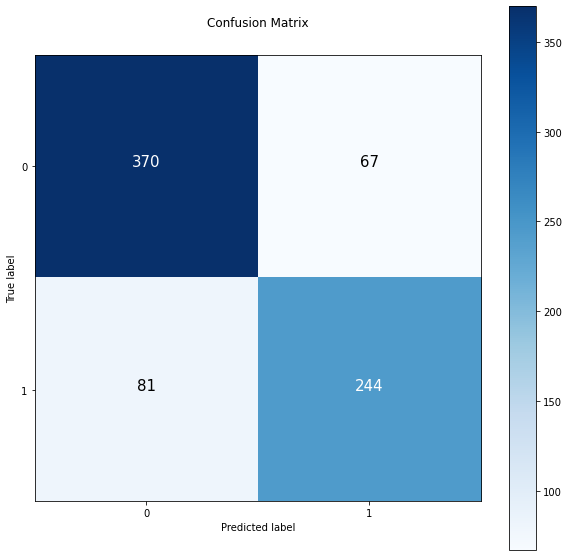

In [140]:
make_confusion_matrix(val_labels,model_6_preds)

## Model 6_1: Transfer Learning Feature Extractor Model from Tensorflow Hub

In [141]:
model_6_1= tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
], name="model_6_1_USE")


model_6_1.compile(loss="binary_crossentropy", optimizer= tf.keras.optimizers.Adam(), metrics=["accuracy"])

In [142]:
model_6_1.summary()

Model: "model_6_1_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 transfer_learning_USE (Kera  (None, 512)              256797824 
 sLayer)                                                         
                                                                 
 dense_8 (Dense)             (None, 64)                32832     
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [143]:
history_6_1= model_6_1.fit(train_sentences, train_labels, epochs=10, validation_data=(val_sentences, val_labels), callbacks=[create_tensorboard_callback(SAVE_DIR, "model_6_transfer_learning_USE_1")])

Saving TensorBoard log files to: model_logs/model_6_transfer_learning_USE_1/20220823-112747
Epoch 1/10
215/215 [==============================] - 4s 14ms/step - loss: 0.5003 - accuracy: 0.7856 - val_loss: 0.4228 - val_accuracy: 0.8136
Epoch 2/10
215/215 [==============================] - 4s 18ms/step - loss: 0.4167 - accuracy: 0.8168 - val_loss: 0.4171 - val_accuracy: 0.8176
Epoch 3/10
215/215 [==============================] - 4s 19ms/step - loss: 0.4031 - accuracy: 0.8192 - val_loss: 0.4071 - val_accuracy: 0.8189
Epoch 4/10
215/215 [==============================] - 3s 12ms/step - loss: 0.3946 - accuracy: 0.8281 - val_loss: 0.4010 - val_accuracy: 0.8241
Epoch 5/10
215/215 [==============================] - 3s 12ms/step - loss: 0.3882 - accuracy: 0.8300 - val_loss: 0.4008 - val_accuracy: 0.8202
Epoch 6/10
215/215 [==============================] - 3s 13ms/step - loss: 0.3822 - accuracy: 0.8340 - val_loss: 0.3988 - val_accuracy: 0.8228
Epoch 7/10
215/215 [==============================

In [144]:
model_6_1_pred_probs= model_6_1.predict(val_sentences)
model_6_1_preds= tf.squeeze(tf.round(model_6_1_pred_probs))
model_6_1_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([1., 0., 0., 1., 0.], dtype=float32)>

In [145]:
model_6_1_results= calculate_results(val_labels,model_6_1_preds)
model_6_1_results

{'accuracy': 83.85826771653542,
 'precision': 0.8393014514696475,
 'recall': 0.8385826771653543,
 'f1': 0.8370970955363254}

In [146]:
baseline_result

{'accuracy': 83.33333333333334,
 'precision': 0.8412202657738648,
 'recall': 0.8333333333333334,
 'f1': 0.8293755882702342}

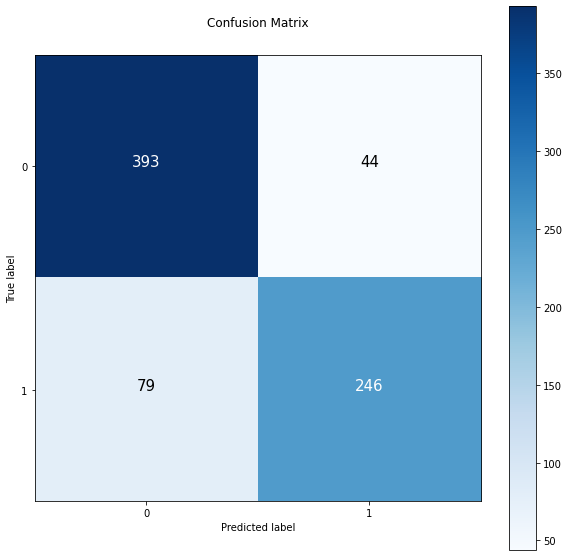

In [147]:
make_confusion_matrix(val_labels,model_6_1_preds)

In [148]:
model_6_2= tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")
], name="model_6_2_USE")


model_6_2.compile(loss="binary_crossentropy", optimizer= tf.keras.optimizers.Adam(), metrics=["accuracy"])

In [149]:
model_6_2.summary()

Model: "model_6_2_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 transfer_learning_USE (Kera  (None, 512)              256797824 
 sLayer)                                                         
                                                                 
 dense_10 (Dense)            (None, 128)               65664     
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 256,863,617
Trainable params: 65,793
Non-trainable params: 256,797,824
_________________________________________________________________


In [150]:
history_6_2= model_6_2.fit(train_sentences, train_labels, epochs=10, validation_data=(val_sentences, val_labels), callbacks=[create_tensorboard_callback(SAVE_DIR, "model_6_transfer_learning_USE_2")])

Saving TensorBoard log files to: model_logs/model_6_transfer_learning_USE_2/20220823-112818
Epoch 1/10
215/215 [==============================] - 4s 13ms/step - loss: 0.4928 - accuracy: 0.7761 - val_loss: 0.4272 - val_accuracy: 0.8097
Epoch 2/10
215/215 [==============================] - 3s 12ms/step - loss: 0.4140 - accuracy: 0.8177 - val_loss: 0.4091 - val_accuracy: 0.8228
Epoch 3/10
215/215 [==============================] - 3s 12ms/step - loss: 0.4011 - accuracy: 0.8231 - val_loss: 0.4011 - val_accuracy: 0.8255
Epoch 4/10
215/215 [==============================] - 3s 12ms/step - loss: 0.3902 - accuracy: 0.8273 - val_loss: 0.4026 - val_accuracy: 0.8255
Epoch 5/10
215/215 [==============================] - 2s 11ms/step - loss: 0.3798 - accuracy: 0.8310 - val_loss: 0.3967 - val_accuracy: 0.8281
Epoch 6/10
215/215 [==============================] - 3s 12ms/step - loss: 0.3688 - accuracy: 0.8349 - val_loss: 0.3952 - val_accuracy: 0.8281
Epoch 7/10
215/215 [==============================

In [151]:
model_6_2_pred_probs= model_6_2.predict(val_sentences)
model_6_2_preds= tf.squeeze(tf.round(model_6_2_pred_probs))
model_6_2_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([1., 0., 0., 1., 0.], dtype=float32)>

In [152]:
model_6_2_results= calculate_results(val_labels,model_6_2_preds)
model_6_2_results

{'accuracy': 83.72703412073491,
 'precision': 0.8373373904996969,
 'recall': 0.8372703412073491,
 'f1': 0.8361333532661765}

In [153]:
baseline_result

{'accuracy': 83.33333333333334,
 'precision': 0.8412202657738648,
 'recall': 0.8333333333333334,
 'f1': 0.8293755882702342}

In [154]:
model_6_3= tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
], name="model_6_3_USE")


model_6_3.compile(loss="binary_crossentropy", optimizer= tf.keras.optimizers.Adam(), metrics=["accuracy"])

In [155]:
model_6_3.summary()

Model: "model_6_3_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 transfer_learning_USE (Kera  (None, 512)              256797824 
 sLayer)                                                         
                                                                 
 dense_12 (Dense)            (None, 64)                32832     
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256,834,881
Trainable params: 37,057
Non-trainable params: 256,797,824
_________________________________________________________________


In [156]:
history_6_3= model_6_3.fit(train_sentences, train_labels, epochs=10, validation_data=(val_sentences, val_labels), callbacks=[create_tensorboard_callback(SAVE_DIR, "model_6_transfer_learning_USE_3")])

Saving TensorBoard log files to: model_logs/model_6_transfer_learning_USE_3/20220823-112901
Epoch 1/10
215/215 [==============================] - 4s 14ms/step - loss: 0.4807 - accuracy: 0.7943 - val_loss: 0.4092 - val_accuracy: 0.8255
Epoch 2/10
215/215 [==============================] - 3s 12ms/step - loss: 0.4042 - accuracy: 0.8212 - val_loss: 0.4103 - val_accuracy: 0.8241
Epoch 3/10
215/215 [==============================] - 3s 12ms/step - loss: 0.3841 - accuracy: 0.8359 - val_loss: 0.3957 - val_accuracy: 0.8373
Epoch 4/10
215/215 [==============================] - 3s 12ms/step - loss: 0.3622 - accuracy: 0.8440 - val_loss: 0.4016 - val_accuracy: 0.8294
Epoch 5/10
215/215 [==============================] - 3s 15ms/step - loss: 0.3344 - accuracy: 0.8600 - val_loss: 0.4023 - val_accuracy: 0.8425
Epoch 6/10
215/215 [==============================] - 3s 12ms/step - loss: 0.3036 - accuracy: 0.8794 - val_loss: 0.4208 - val_accuracy: 0.8241
Epoch 7/10
215/215 [==============================

In [157]:
model_6_3_pred_probs= model_6_3.predict(val_sentences)
model_6_3_preds= tf.squeeze(tf.round(model_6_3_pred_probs))
model_6_3_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([1., 0., 0., 1., 0.], dtype=float32)>

In [158]:
model_6_3_results= calculate_results(val_labels,model_6_3_preds)
model_6_3_results

{'accuracy': 82.02099737532808,
 'precision': 0.8219500926882624,
 'recall': 0.8202099737532809,
 'f1': 0.8177907076766036}

In [159]:
baseline_result

{'accuracy': 83.33333333333334,
 'precision': 0.8412202657738648,
 'recall': 0.8333333333333334,
 'f1': 0.8293755882702342}

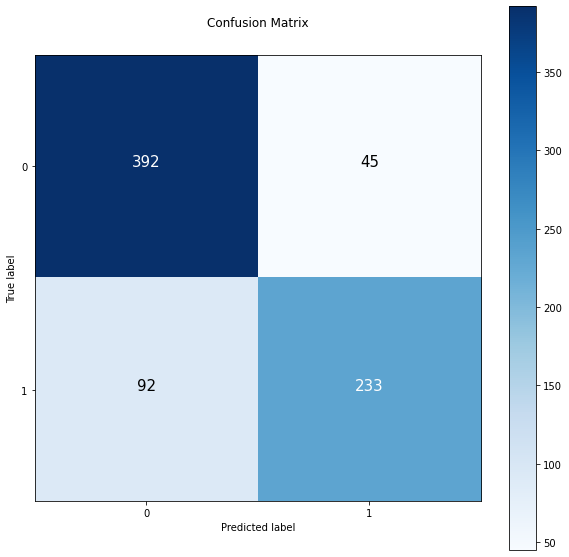

In [160]:
make_confusion_matrix(val_labels,model_6_3_preds)

## Model 7: Transfer Learning using USE with only 10% of the dataset

> Transfer Learning helps when we don't have a large dataset

> Let's see how th `USE` model from Tensorflow Hub performs only on `10%` of the dataset

In [161]:
len(train_sentences)

6851

### Creating `10%` datasets

In [162]:
## NOTE: Making data splits like below leads to data leakage(model_7 trained on only 10% of the data, outperforms model_6 trained on 100% of the data)
## Do not make data splits which lead to Data leakage from Validation/Test datasets into training set. It is like the model is cheating on the test set as it has already seen some of the questions from the test which studying for the test(i.e training on the train dataset)

# train_10_percent= train_shuffled[['text', 'target']].sample(frac=0.1, random_state=22)
# train_sentences_10_percent= train_10_percent['text'].to_list()
# train_labels_10_percent=train_10_percent['target'].to_list()

## Fixing the Data Leakage Issue

In [163]:
train_10_percent_split= int(0.1 * len(train_sentences))
train_10_percent_split

685

In [164]:
train_10_percent= train_sentences[:train_10_percent_split]

train_sentences_10_percent= train_sentences[:train_10_percent_split]
train_labels_10_percent= train_labels[:train_10_percent_split]

len(train_10_percent), len(train_labels_10_percent), len(train_sentences_10_percent)

(685, 685, 685)

In [165]:
train_10_percent[:5]

array(["RT @GreenHarvard: Documenting climate change's first major casualty http://t.co/4q4zd7oU34 via @GreenHarvard",
       '#Colorado #News Motorcyclist bicyclist injured in Denver collision on Broadway: At least two people were tak... http://t.co/2iAFPmqJeP',
       "Wreckage 'Conclusively Confirmed' as From MH370: Malaysia PM: Investigators and the families of those who were... http://t.co/VAZpG0ftmU",
       'HURRICANE GUILLERMO LIVE NOAA TRACKING / LOOPING WED.AUG.5TH ~ http://t.co/RjopJKbydR ~  http://t.co/NUFDgw9YEv http://t.co/2oKSCwYoHC',
       '@morehouse64 It appears our #Govt has lost an #Ethical and or moral relevance. This means the whole #USA population is in danger from them.'],
      dtype=object)

In [166]:
train_labels_10_percent[:5]

array([1, 1, 1, 1, 0])

In [167]:
train_sentences_10_percent[:5]

array(["RT @GreenHarvard: Documenting climate change's first major casualty http://t.co/4q4zd7oU34 via @GreenHarvard",
       '#Colorado #News Motorcyclist bicyclist injured in Denver collision on Broadway: At least two people were tak... http://t.co/2iAFPmqJeP',
       "Wreckage 'Conclusively Confirmed' as From MH370: Malaysia PM: Investigators and the families of those who were... http://t.co/VAZpG0ftmU",
       'HURRICANE GUILLERMO LIVE NOAA TRACKING / LOOPING WED.AUG.5TH ~ http://t.co/RjopJKbydR ~  http://t.co/NUFDgw9YEv http://t.co/2oKSCwYoHC',
       '@morehouse64 It appears our #Govt has lost an #Ethical and or moral relevance. This means the whole #USA population is in danger from them.'],
      dtype=object)

In [168]:
len(train_labels_10_percent), len(train_sentences_10_percent)

(685, 685)

In [169]:
pd.Series(np.array(train_labels_10_percent)).value_counts()

0    362
1    323
dtype: int64

In [170]:
train_shuffled["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [171]:
362 + 323

685

In [172]:
323 / 362

0.8922651933701657

### Building Model 7

In [173]:
model_7= tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
], name="model_7_USE")


model_7.compile(loss="binary_crossentropy", optimizer= tf.keras.optimizers.Adam(), metrics=["accuracy"])

In [174]:
model_7.summary()

Model: "model_7_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 transfer_learning_USE (Kera  (None, 512)              256797824 
 sLayer)                                                         
                                                                 
 dense_15 (Dense)            (None, 64)                32832     
                                                                 
 dense_16 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [175]:
history_7= model_7.fit(train_sentences_10_percent, train_labels_10_percent, epochs=10, validation_data=(val_sentences, val_labels), callbacks=[create_tensorboard_callback(SAVE_DIR, "model_7_transfer_learning_USE_10_percent_correct_split")])

Saving TensorBoard log files to: model_logs/model_7_transfer_learning_USE_10_percent_correct_split/20220823-112944
Epoch 1/10
22/22 [==============================] - 3s 46ms/step - loss: 0.6696 - accuracy: 0.6993 - val_loss: 0.6409 - val_accuracy: 0.7428
Epoch 2/10
22/22 [==============================] - 1s 26ms/step - loss: 0.6080 - accuracy: 0.7562 - val_loss: 0.5815 - val_accuracy: 0.7441
Epoch 3/10
22/22 [==============================] - 1s 26ms/step - loss: 0.5432 - accuracy: 0.7825 - val_loss: 0.5275 - val_accuracy: 0.7756
Epoch 4/10
22/22 [==============================] - 1s 26ms/step - loss: 0.4916 - accuracy: 0.7898 - val_loss: 0.4949 - val_accuracy: 0.7651
Epoch 5/10
22/22 [==============================] - 1s 48ms/step - loss: 0.4555 - accuracy: 0.8058 - val_loss: 0.4776 - val_accuracy: 0.7717
Epoch 6/10
22/22 [==============================] - 1s 56ms/step - loss: 0.4294 - accuracy: 0.8175 - val_loss: 0.4722 - val_accuracy: 0.7756
Epoch 7/10
22/22 [=====================

In [176]:
model_7_pred_probs= model_7.predict(val_sentences)
model_7_preds= tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([1., 0., 0., 1., 0.], dtype=float32)>

In [177]:
model_7_results= calculate_results(val_labels,model_7_preds)
model_7_results

{'accuracy': 78.08398950131233,
 'precision': 0.7838303617220261,
 'recall': 0.7808398950131233,
 'f1': 0.7816232069019564}

In [178]:
baseline_result

{'accuracy': 83.33333333333334,
 'precision': 0.8412202657738648,
 'recall': 0.8333333333333334,
 'f1': 0.8293755882702342}

In [179]:
model_6_2_results

{'accuracy': 83.72703412073491,
 'precision': 0.8373373904996969,
 'recall': 0.8372703412073491,
 'f1': 0.8361333532661765}

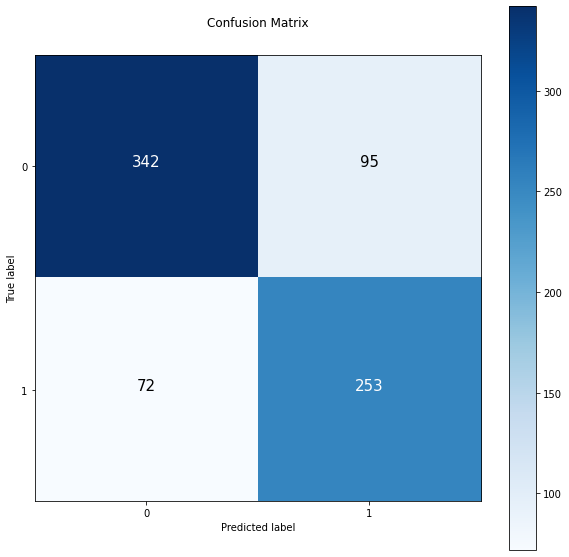

In [180]:
make_confusion_matrix(val_labels,model_7_preds)

## Conclusion

> Be Careful when creating training/validation/test dataset splits that do not leak data across datasets, otherwise the model's evaluation metrics will be wrong. If something looks too good to be true(a model trained on only `10%` of the data outperforming the same model trained on `100%` of the data), trust your gut and `go back through to find where the error may lie or coming from`.

## Comparing the performance of all the models

### Combining all the results of the models in a DataFrame

In [181]:
all_model_results = pd.DataFrame({"0_baseline": baseline_result,
                                  "1_simple_dense": model_1_results,
                                  "2_lstm": model_2_results,
                                  "3_gru": model_3_results,
                                  "4_bidirectional": model_4_results,
                                  "5_conv1d": model_5_results,
                                  "6_tf_hub_sentence_encoder": model_6_results,
                                  "6_2_tf_hub_sentence_encoder": model_6_2_results,
                                  "7_tf_hub_10_percent_data": model_7_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
0_baseline,83.333333,0.841220,0.833333,0.829376
1_simple_dense,79.396325,0.793884,0.793963,0.793922
2_lstm,77.821522,0.777244,0.778215,0.777236
3_gru,76.246719,0.761551,0.762467,0.761784
4_bidirectional,75.328084,0.753093,0.753281,0.753182
5_conv1d,74.146982,0.743362,0.741470,0.742128
6_tf_hub_sentence_encoder,80.577428,0.805116,0.805774,0.805168
6_2_tf_hub_sentence_encoder,83.727034,0.837337,0.837270,0.836133
7_tf_hub_10_percent_data,78.083990,0.783830,0.780840,0.781623


In [182]:
all_model_results['accuracy']= all_model_results['accuracy']/100
all_model_results

,accuracy,precision,recall,f1
0_baseline,0.833333,0.841220,0.833333,0.829376
1_simple_dense,0.793963,0.793884,0.793963,0.793922
2_lstm,0.778215,0.777244,0.778215,0.777236
3_gru,0.762467,0.761551,0.762467,0.761784
4_bidirectional,0.753281,0.753093,0.753281,0.753182
5_conv1d,0.741470,0.743362,0.741470,0.742128
6_tf_hub_sentence_encoder,0.805774,0.805116,0.805774,0.805168
6_2_tf_hub_sentence_encoder,0.837270,0.837337,0.837270,0.836133
7_tf_hub_10_percent_data,0.780840,0.783830,0.780840,0.781623


## Plotting and comparing the results of the models

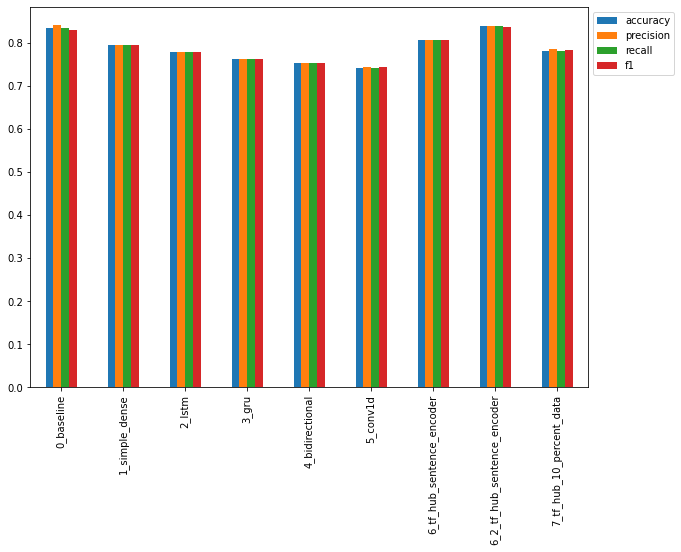

In [183]:
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

### Getting only the `F1-score`

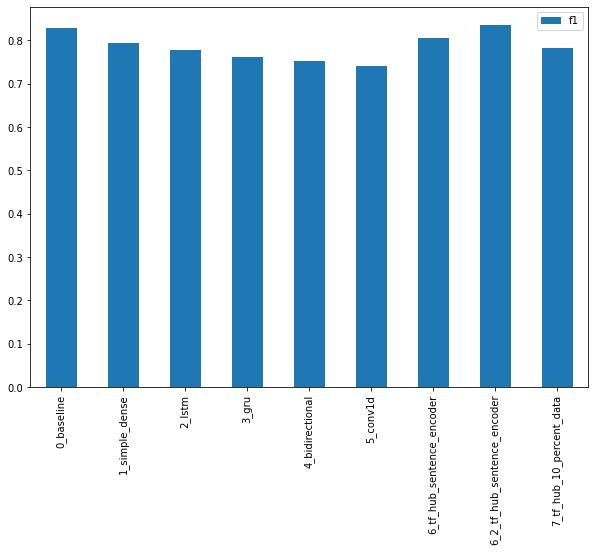

In [184]:
all_model_results['f1'].plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

#### Sorting the `f1-scores` for easier visualization

In [185]:
all_model_results_sort=all_model_results.sort_values('f1', ascending=False)['f1']
all_model_results_sort

6_2_tf_hub_sentence_encoder    0.836133
0_baseline                     0.829376
6_tf_hub_sentence_encoder      0.805168
1_simple_dense                 0.793922
7_tf_hub_10_percent_data       0.781623
2_lstm                         0.777236
3_gru                          0.761784
4_bidirectional                0.753182
5_conv1d                       0.742128
Name: f1, dtype: float64

### `F1-scores` in Descending Order for easier Visualization

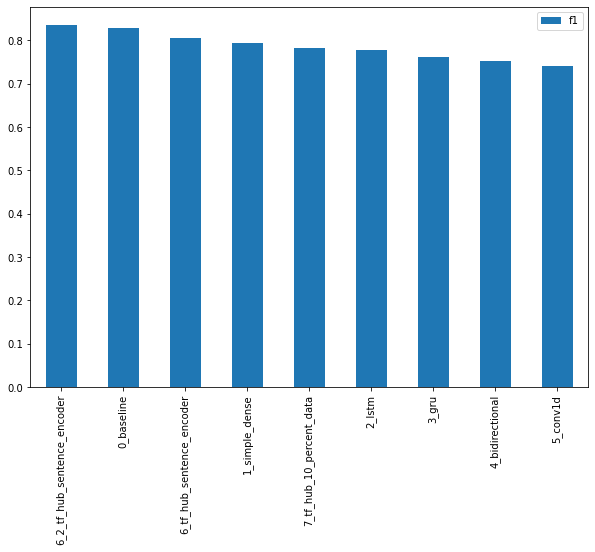

In [186]:
all_model_results_sort.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

## Tensorboard using Tensorboard.dev

In [187]:
!tensorboard dev upload --logdir ./model_logs \
--name "Introduction to Natural Language Processing or NLP" \
--description "It is based on the Introduction to NLP dataset from kaggle, Disastrous tweets, Binary Classification Problem. If a tweet is a disastrous tweet or not." \
--one_shot


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./model_logs

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) no


### Tensorboard Link

Link -> https://tensorboard.dev/experiment/pRP6M7d0Sbiq0VLIDUOhpA/#scalars

## Saving the Best model with `.h5` format

In [188]:
model_6_2.save("/model_6.h5")

## Loading saved model

In [189]:
loaded_model= tf.keras.models.load_model("/model_6.h5", custom_objects={"KerasLayer": hub.KerasLayer})

In [190]:
loaded_model.summary()

Model: "model_6_2_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 transfer_learning_USE (Kera  (None, 512)              256797824 
 sLayer)                                                         
                                                                 
 dense_10 (Dense)            (None, 128)               65664     
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 256,863,617
Trainable params: 65,793
Non-trainable params: 256,797,824
_________________________________________________________________


In [191]:
loaded_model_pred_probs= loaded_model.predict(val_sentences)
loaded_model_preds= tf.squeeze(tf.round(loaded_model_pred_probs))
loaded_model_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([1., 0., 0., 1., 0.], dtype=float32)>

In [192]:
loaded_model_results= calculate_results(val_labels,loaded_model_preds)
loaded_model_results

{'accuracy': 83.72703412073491,
 'precision': 0.8373373904996969,
 'recall': 0.8372703412073491,
 'f1': 0.8361333532661765}

In [193]:
model_6_2_results

{'accuracy': 83.72703412073491,
 'precision': 0.8373373904996969,
 'recall': 0.8372703412073491,
 'f1': 0.8361333532661765}

## Saving the Best model with `.h5` format

In [194]:
SAVE_MODEL='saved_models'

In [195]:
model_6_2.save(SAVE_MODEL)

In [196]:
loaded_model_1= tf.keras.models.load_model(SAVE_MODEL)

In [197]:
loaded_model_1.summary()

Model: "model_6_2_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 transfer_learning_USE (Kera  (None, 512)              256797824 
 sLayer)                                                         
                                                                 
 dense_10 (Dense)            (None, 128)               65664     
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 256,863,617
Trainable params: 65,793
Non-trainable params: 256,797,824
_________________________________________________________________


In [198]:
loaded_model_pred_probs_1= loaded_model_1.predict(val_sentences)
loaded_model_preds_1= tf.squeeze(tf.round(loaded_model_pred_probs_1))
loaded_model_preds_1[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([1., 0., 0., 1., 0.], dtype=float32)>

In [199]:
loaded_model_results_1= calculate_results(val_labels,loaded_model_preds_1)
loaded_model_results_1

{'accuracy': 83.72703412073491,
 'precision': 0.8373373904996969,
 'recall': 0.8372703412073491,
 'f1': 0.8361333532661765}

In [200]:
model_6_2_results

{'accuracy': 83.72703412073491,
 'precision': 0.8373373904996969,
 'recall': 0.8372703412073491,
 'f1': 0.8361333532661765}

## Conclusion

> The model saved and loaded properly.

## Checking the most wrong examples

In [201]:
loaded_model_1.summary()

Model: "model_6_2_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 transfer_learning_USE (Kera  (None, 512)              256797824 
 sLayer)                                                         
                                                                 
 dense_10 (Dense)            (None, 128)               65664     
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 256,863,617
Trainable params: 65,793
Non-trainable params: 256,797,824
_________________________________________________________________


In [202]:
loaded_model_results_1

{'accuracy': 83.72703412073491,
 'precision': 0.8373373904996969,
 'recall': 0.8372703412073491,
 'f1': 0.8361333532661765}

### Create dataframe with validation sentences and best performing model predictions

In [203]:
val_df = pd.DataFrame({"text": val_sentences,
                       "target": val_labels,
                       "pred": loaded_model_preds_1,
                       "pred_prob": tf.squeeze(loaded_model_pred_probs_1)})
val_df.head()

,text,target,pred,pred_prob
0,Three-alarm fire destroys two residential buil...,1,1.0,0.989708
1,Do you feel engulfed with low self-image? Take...,0,0.0,0.080954
2,James Kunstler: How bad architecture wrecked c...,0,0.0,0.299679
3,natural disaster ÛÒ News Stories About natura...,1,1.0,0.967064
4,New Explosion-proof Tempered Glass Screen Prot...,0,0.0,0.100487


## These are False Positives

In [204]:
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob", ascending=False)
most_wrong[:10] 

,text,target,pred,pred_prob
136,Kosciusko police investigating pedestrian fata...,0,1.0,0.997076
473,@TwopTwips make natural disaster reporting mor...,0,1.0,0.966229
106,Mourning notices for stabbing arson victims st...,0,1.0,0.960852
757,LRT LOOK AT ALL MY TOM FEELS FLOODING BACK,0,1.0,0.950706
555,Former Township fire truck being used in Phili...,0,1.0,0.948363
69,Google Alert: Emergency units simulate a chemi...,0,1.0,0.921542
478,@nalathekoala As a health care professional th...,0,1.0,0.859332
584,A look at state actions a year after Ferguson'...,0,1.0,0.854584
550,@missleylaha I didn't get to buy one after the...,0,1.0,0.841558
675,#Turkish couple decided to feed 4000 #Syrian #...,0,1.0,0.825146


## Explaination

* `0` -> Not Disaster
* `1` -> Disaster

## These are False Negatives

In [205]:
most_wrong.tail()

,text,target,pred,pred_prob
515,Hellfire is surrounded by desires so be carefu...,1,0.0,0.048326
134,Flattened thee striker,1,0.0,0.046988
434,Why did I come to work today.. Literally wanna...,1,0.0,0.040260
115,If you're in search of powerful content to imp...,1,0.0,0.033145
144,@HaydnExists so glad i saved them all at once ...,1,0.0,0.032968


In [206]:
len(most_wrong)

124

## Visualizing the false positives (model predicted 1 when should've been 0)

In [207]:
for row in most_wrong[:10].itertuples(): # loop through the top 10 rows (change the index to view different rows)
  _, text, target, pred, prob = row
  print(f"Target: {target}, Pred: {int(pred)}, Prob: {prob}")
  print(f"Text:\n{text}\n")
  print("----\n")



Target: 0, Pred: 1, Prob: 0.997076153755188
Text:
Kosciusko police investigating pedestrian fatality hit by a train Thursday http://t.co/m5djLLxoZP

----

Target: 0, Pred: 1, Prob: 0.9662287831306458
Text:
@TwopTwips make natural disaster reporting more interesting by adding 'The' to headlines such as 'Rescuers are sifting through the wreckage'

----

Target: 0, Pred: 1, Prob: 0.9608519077301025
Text:
Mourning notices for stabbing arson victims stir Û÷politics of griefÛª in Israel: Posters for Shira Banki and A... http://t.co/3GZ5zQQTHe

----

Target: 0, Pred: 1, Prob: 0.9507059454917908
Text:
LRT LOOK AT ALL MY TOM FEELS FLOODING BACK

----

Target: 0, Pred: 1, Prob: 0.9483629465103149
Text:
Former Township fire truck being used in Philippines - Langley Times http://t.co/iMiLsFxntf #filipino

----

Target: 0, Pred: 1, Prob: 0.9215422868728638
Text:
Google Alert: Emergency units simulate a chemical explosion at NU http://t.co/NDgpWYxu6H

----

Target: 0, Pred: 1, Prob: 0.859332323074

## Check the most wrong false negatives (model predicted 0 when should've predict 1)

In [208]:
for row in most_wrong[-10:].itertuples():
  _, text, target, pred, prob = row
  print(f"Target: {target}, Pred: {int(pred)}, Prob: {prob}")
  print(f"Text:\n{text}\n")
  print("----\n")



Target: 1, Pred: 0, Prob: 0.06775260716676712
Text:
Reddit Will Now Quarantine Offensive Content http://t.co/WosYPVQUFI http://t.co/XW8SDS1Tjp

----

Target: 1, Pred: 0, Prob: 0.0654115080833435
Text:
@blakeshelton DON'T be a FART ??in a WINDSTORM.FOLLOW ME ALREADY. JEEZ.

----

Target: 1, Pred: 0, Prob: 0.06530841439962387
Text:
Reddit's new content policy goes into effect many horrible subreddits banned or quarantined http://t.co/ZsXqbdUzBN http://t.co/6NCfjXPLOY

----

Target: 1, Pred: 0, Prob: 0.06275013089179993
Text:
VICTORINOX SWISS ARMY DATE WOMEN'S RUBBER MOP WATCH 241487 http://t.co/yFy3nkkcoH http://t.co/KNEhVvOHVK

----

Target: 1, Pred: 0, Prob: 0.05072716251015663
Text:
Please allow me to reiterate it's not the weapon it's the mindset of the individual! #professional #help! -LEGION! https://t.co/2lGTZkwMqW

----

Target: 1, Pred: 0, Prob: 0.04832582548260689
Text:
Hellfire is surrounded by desires so be careful and donÛªt let your desires control you! #Afterlife

----

T

In [209]:
test

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


## Making predictions on the test dataset

In [210]:
text_sentences= test["text"].to_list()
text_samples= random.sample(text_sentences,10)
for sample in text_samples:
  pred_prob= tf.squeeze(loaded_model_1.predict([sample]))
  pred= tf.round(pred_prob)
  print(f"Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"Text:\n{sample}\n")
  print("----\n")

Pred: 1, Prob: 0.9308430552482605
Text:
hermancranston: WIRED : All these fires are burning through firefighters' budgets http://t.co/FSGAnfRgjH http://t.co/ju9zzu9TiOÛ_ Û_

----

Pred: 0, Prob: 0.01129915937781334
Text:
@asda bought this bargain dress and love it- cut colour pattern. Are you doing more? http://t.co/BnZm8K2AiM

----

Pred: 0, Prob: 0.25045695900917053
Text:
@bbcworld Bioterrorism drones can reach large populated erea.

----

Pred: 0, Prob: 0.33458346128463745
Text:
Barton-Le-Clay house owner told to demolish extension - BBC News http://t.co/inxvExrsyV

----

Pred: 1, Prob: 0.8148281574249268
Text:
via Jerusalem Post: WATCH: Israel performs controlled detonation of land mines on Golan Heights... http://t.co/rFB2ft4wX0

----

Pred: 0, Prob: 0.0938606932759285
Text:
Crackdown 3 Destruction Restricted To Multiplayer; Co-Developed By Sumo Digital: Crackdown 3 åÊwas definitely o... http://t.co/O4B1KIyx1P

----

Pred: 0, Prob: 0.37653419375419617
Text:
tarmineta3: Breaking 

In [211]:
text_sentences[:10]

['Just happened a terrible car crash',
 'Heard about #earthquake is different cities, stay safe everyone.',
 'there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all',
 'Apocalypse lighting. #Spokane #wildfires',
 'Typhoon Soudelor kills 28 in China and Taiwan',
 "We're shaking...It's an earthquake",
 "They'd probably still show more life than Arsenal did yesterday, eh? EH?",
 'Hey! How are you?',
 'What a nice hat?',
 'Fuck off!']

### Predicting on the test dataset

In [212]:
test[:5]

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [213]:
val_sentences[:5]

array(['Three-alarm fire destroys two residential buildings a car in Manchester N.H. on Sunday afternoon http://t.co/rVkyj3YUVK',
       'Do you feel engulfed with low self-image? Take the quiz: http://t.co/YzDmouXQBO http://t.co/PeXfgawrG1',
       'James Kunstler: How bad architecture wrecked cities http://t.co/Ac6I3tE8mT #residualincome #mlm http://t.co/Wq0JLsHW1g',
       'natural disaster \x89ÛÒ News Stories About natural disaster - Page 1 | Newser http://t.co/TB8gZEMbXU',
       'New Explosion-proof Tempered Glass Screen Protector Film for Blackberry Z10 - Full read by\x89Û_ http://t.co/ModqNaLWsB http://t.co/4C58oOaVhY'],
      dtype=object)

In [216]:
test_pred_probs= loaded_model_1.predict(text_sentences)
test_pred_probs

array([[0.5780627 ],
       [0.93321663],
       [0.88510346],
       ...,
       [0.97000736],
       [0.7836527 ],
       [0.66973495]], dtype=float32)

In [217]:
test_preds= tf.squeeze(tf.round(test_pred_probs))
test_preds

<tf.Tensor: shape=(3263,), dtype=float32, numpy=array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)>

In [218]:
loaded_model_preds_1[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([1., 0., 0., 1., 0.], dtype=float32)>

## Creating the Test Dataset

In [219]:
test_sentences= test['text'].to_list()
test_sentences[:5]

['Just happened a terrible car crash',
 'Heard about #earthquake is different cities, stay safe everyone.',
 'there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all',
 'Apocalypse lighting. #Spokane #wildfires',
 'Typhoon Soudelor kills 28 in China and Taiwan']

In [220]:
test_pred_probs= loaded_model_1.predict(test_sentences)
test_preds= tf.squeeze(tf.round(test_pred_probs))
test_preds

<tf.Tensor: shape=(3263,), dtype=float32, numpy=array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)>

In [221]:
test_df = pd.DataFrame({"text": test_sentences,
                      #  "target": val_labels, # Since this is the test dataset.
                       "pred": test_preds,
                       "pred_prob": tf.squeeze(test_pred_probs)})
test_df.head()

,text,pred,pred_prob
0,Just happened a terrible car crash,1.0,0.578063
1,"Heard about #earthquake is different cities, s...",1.0,0.933217
2,"there is a forest fire at spot pond, geese are...",1.0,0.885103
3,Apocalypse lighting. #Spokane #wildfires,1.0,0.936110
4,Typhoon Soudelor kills 28 in China and Taiwan,1.0,0.984183


## Predicting on Custom Tweets with the best model

In [222]:
custom_text= "Look...If you had One shot Or one opportunity To learn @PyTorch just like you wanted? In one video? Would you watch it? Or just let it slip?"

In [223]:
custom_pred_probs= loaded_model_1.predict([custom_text])
custom_pred_probs

array([[0.12521885]], dtype=float32)

In [224]:
custom_preds= tf.squeeze(tf.round(custom_pred_probs))
custom_preds

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

In [225]:
custom_preds= tf.squeeze(custom_pred_probs)
custom_preds

<tf.Tensor: shape=(), dtype=float32, numpy=0.12521885>

In [226]:
custom_preds= tf.round(custom_pred_probs)
custom_preds

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.]], dtype=float32)>

In [227]:
custom_pred_prob= tf.squeeze(loaded_model_1.predict([custom_text]))
custom_pred_prob

<tf.Tensor: shape=(), dtype=float32, numpy=0.12521885>

In [228]:
custom_pred= tf.round(custom_pred_prob)
custom_pred

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

In [229]:
custom_pred_prob= tf.squeeze(loaded_model_1.predict([custom_text]))
custom_pred= tf.round(custom_pred_prob)
custom_pred

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

In [230]:
print(f"Pred: {int(custom_pred)}, Prob: {custom_pred_prob}")
print(f"Text:\n{custom_text}\n")

Pred: 0, Prob: 0.12521885335445404
Text:
Look...If you had One shot Or one opportunity To learn @PyTorch just like you wanted? In one video? Would you watch it? Or just let it slip?



## Function to predict on Custom Tweets or Tweets from the wild/unknown

In [231]:
def predict_on_sentence(model, sentence):
  """
  Uses model to make a prediction on sentence.

  Returns the sentence, the predicted label and the prediction probability.
  """
  pred_prob = model.predict([sentence])
  pred_label = tf.squeeze(tf.round(pred_prob)).numpy()
  print(f"Pred: {pred_label}", "(real disaster)" if pred_label > 0 else "(not real disaster)", f"Prob: {pred_prob[0][0]}")
  print(f"Text:\n{sentence}")

## Not a disaster Tweets

In [232]:
predict_on_sentence(loaded_model_1, custom_text)

Pred: 0.0 (not real disaster) Prob: 0.12521888315677643
Text:
Look...If you had One shot Or one opportunity To learn @PyTorch just like you wanted? In one video? Would you watch it? Or just let it slip?


In [233]:
custom_text_1='Life like an ensemble: take the best choices from others and make your own'

In [234]:
predict_on_sentence(loaded_model_1, custom_text_1)

Pred: 0.0 (not real disaster) Prob: 0.07724031060934067
Text:
Life like an ensemble: take the best choices from others and make your own


In [235]:
custom_text_2='What a world where you can learn the fundamental algos of modern ML from one of the best... whenever you want'

In [236]:
predict_on_sentence(loaded_model_1, custom_text_2)

Pred: 0.0 (not real disaster) Prob: 0.07093335688114166
Text:
What a world where you can learn the fundamental algos of modern ML from one of the best... whenever you want


In [237]:
custom_text_3= "!!!! Ok I recorded a (new!) 2h25m lecture on 'The spelled-out intro to neural networks and backpropagation: building micrograd' https://youtube.com/watch?v=VMj-3S1tku0 .This is the culmination of about 8 years of obsessing about the best way to explain neural nets and backprop."

In [238]:
predict_on_sentence(loaded_model_1, custom_text_3)

Pred: 0.0 (not real disaster) Prob: 0.22835618257522583
Text:
!!!! Ok I recorded a (new!) 2h25m lecture on 'The spelled-out intro to neural networks and backpropagation: building micrograd' https://youtube.com/watch?v=VMj-3S1tku0 .This is the culmination of about 8 years of obsessing about the best way to explain neural nets and backprop.


## Some disasterous Tweets

In [239]:
custom_text_4='Remembering Jacob, Matt and the other nine men who sadly lost their lives 7 years ago in the Shoreham Air Disaster 💙 #bhafc #Together'

In [240]:
predict_on_sentence(loaded_model_1, custom_text_4)

Pred: 0.0 (not real disaster) Prob: 0.4272144138813019
Text:
Remembering Jacob, Matt and the other nine men who sadly lost their lives 7 years ago in the Shoreham Air Disaster 💙 #bhafc #Together


In [241]:
custom_text_5= 'Brexshit. The disaster that keeps on disastering.'

In [242]:
predict_on_sentence(loaded_model_1, custom_text_5)

Pred: 0.0 (not real disaster) Prob: 0.45495423674583435
Text:
Brexshit. The disaster that keeps on disastering.


## Conclusion

> Model is Working Fine as expected on the custom tweets

## The Speed/Score tradeoff

### Function to measure the time of prediction

In [243]:
import time
def pred_timer(model, samples):
  """
  Times how long a model takes to make predictions on samples.
  
  Args:
  ----
  model = a trained model
  sample = a list of samples

  Returns:
  ----
  total_time = total elapsed time for model to make predictions on samples
  time_per_pred = time in seconds per single sample
  """
  start_time = time.perf_counter() # get start time
  model.predict(samples) # make predictions
  end_time = time.perf_counter() # get finish time
  total_time = end_time-start_time # calculate how long predictions took to make
  time_per_pred = total_time/len(val_sentences) # find prediction time per sample
  return total_time, time_per_pred

### Calculate TF Hub Sentence Encoder prediction times

In [244]:
model_6_total_pred_time, model_6_time_per_pred = pred_timer(loaded_model_1, val_sentences)
model_6_total_pred_time, model_6_time_per_pred

(0.2395492780000268, 0.00031436913123363095)

In [245]:
baseline_total_pred_time, baseline_time_per_pred = pred_timer(model_0, val_sentences)
baseline_total_pred_time, baseline_time_per_pred

(0.02731682599994656, 3.584885301830257e-05)

In [246]:
loaded_model_results_1

{'accuracy': 83.72703412073491,
 'precision': 0.8373373904996969,
 'recall': 0.8372703412073491,
 'f1': 0.8361333532661765}

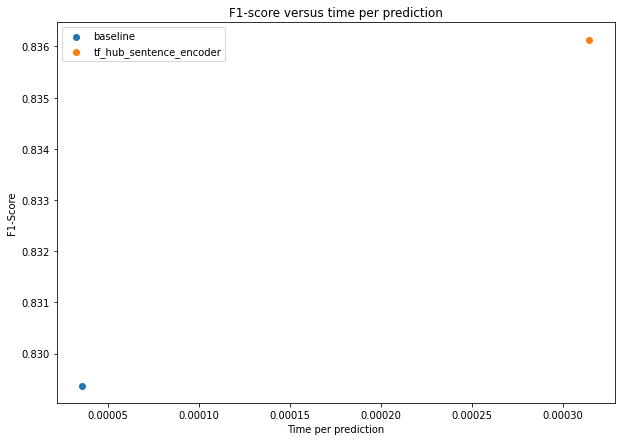

In [247]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(baseline_time_per_pred, baseline_result["f1"], label="baseline")
plt.scatter(model_6_time_per_pred, loaded_model_results_1["f1"], label="tf_hub_sentence_encoder")
plt.legend()
plt.title("F1-score versus time per prediction")
plt.xlabel("Time per prediction")
plt.ylabel("F1-Score");

## Ensemble Model Exercise

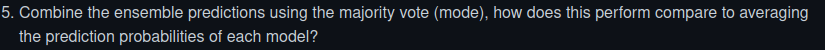

### The model we will be using

* TF Hub USE model -> `model_6_2`
* LSTM model -> `model_2`
* Conv1D model -> `model_5`
* GRU model -> `model_3_1`
* baseline model -> `model_0`

In [ ]:
test

In [ ]:
test_sentences= test['text'].to_numpy()
test_sentences

## Function to get the predictions of the models

In [250]:
def give_preds(model, test_sentences):
  '''
  This model takes a model and the test sentences as input. 
  Returns the prediction array of [0,1.....]
  '''
  pred_probs = model.predict(test_sentences)
  preds = tf.squeeze(tf.round(pred_probs))
  preds = tf.cast(preds , dtype = tf.int32)

  return preds

In [251]:
model_6_2_preds= give_preds(model_6_2, test_sentences)
model_2_preds= give_preds(model_2, test_sentences)
model_5_preds= give_preds(model_5, test_sentences)
model_3_1_preds= give_preds(model_3_1, test_sentences)
model_0_preds= give_preds(model_0, test_sentences)

In [252]:
len(model_6_2_preds), len(model_2_preds),len(model_5_preds), len(model_3_1_preds), len(model_0_preds)

(3263, 3263, 3263, 3263, 3263)

In [253]:
model_6_2_preds[:5] , model_3_1_preds[:5] , model_0_preds[:5]

(<tf.Tensor: shape=(5,), dtype=int32, numpy=array([1, 1, 1, 1, 1], dtype=int32)>,
 <tf.Tensor: shape=(5,), dtype=int32, numpy=array([1, 0, 1, 1, 1], dtype=int32)>,
 <tf.Tensor: shape=(5,), dtype=int32, numpy=array([1, 0, 1, 1, 1], dtype=int32)>)

### Prediction DataFrame

In [254]:
preds_df = pd.DataFrame({'USE_model': model_6_2_preds , 
              'LSTM_model': model_2_preds , 
              'Conv1D_model': model_5_preds,
              'GRU_model': model_3_1_preds,
              'baseline_model': model_0_preds
              })
preds_df.head()

,USE_model,LSTM_model,Conv1D_model,GRU_model,baseline_model
0,1,0,1,1,1
1,1,0,0,0,0
2,1,1,1,1,1
3,1,0,1,1,1
4,1,1,1,1,1


In [256]:
preds_df['majority_vote_preds'] = preds_df.mode(axis = 1) # To get the mojority value in each row
preds_df.head()

,USE_model,LSTM_model,Conv1D_model,GRU_model,baseline_model,majority_vote_preds
0,1,0,1,1,1,1
1,1,0,0,0,0,0
2,1,1,1,1,1,1
3,1,0,1,1,1,1
4,1,1,1,1,1,1


In [257]:
mode_preds_array = preds_df['majority_vote_preds'].to_numpy()
mode_preds_array

array([1, 0, 1, ..., 1, 1, 1], dtype=int32)

In [262]:
ensemble_model_submission= pd.DataFrame({'id': test['id'], 'target': (mode_preds_array)})
ensemble_model_submission

,id,target
0,0,1
1,2,0
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1


## Ensemble Model Predictions `CSV` file

In [264]:
ensemble_model_submission.to_csv('ensemble_model_submission.csv', index=False)

In [259]:
# Predictions on the validation sentences 
val_preds = give_preds(model_6_2 , val_sentences)

# Creating a array of our class names 
class_names = ['not_a_disaster' , 'disaster']

# Checking the preds and true labels shape
val_preds.shape , val_labels.shape

(TensorShape([762]), (762,))

## Confusion matrix on the validation set with the best model

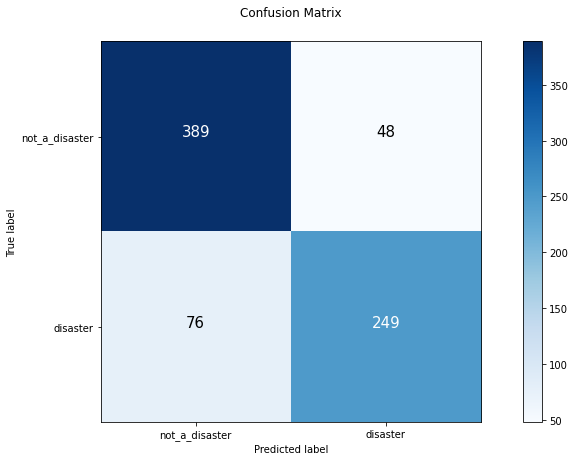

In [260]:
make_confusion_matrix(y_true= val_labels , 
                      y_pred = val_preds , 
                      classes = class_names , 
                      figsize= (15 , 7), 
                      norm = False , 
                      savefig = True , 
                      text_size = 15)